# 1. Library

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, mean_absolute_percentage_error
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import joblib
import pickle
import shap
import concurrent.futures
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
#from sktime.performance_metrics.forecasting import mean_squared_percentage_error, median_absolute_percentage_error, mean_relative_absolute_error, median_relative_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam

# 한글 폰트
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import sys
import sklearn
import tensorflow as tf
import shap

# 버전 확인
print("Python version:", sys.version)
print("scikit-learn version:", sklearn.__version__)
print("TensorFlow version:", tf.__version__)
print("SHAP version:", shap.__version__)

Python version: 3.9.20 (main, Oct  3 2024, 07:38:01) [MSC v.1929 64 bit (AMD64)]
scikit-learn version: 1.5.2
TensorFlow version: 2.18.0
SHAP version: 0.46.0


In [3]:
file_path = r"C:\Users\james\J_Data_Lab\Project_subway\data\df_subway_v34.csv"
df = pd.read_csv(file_path)
df

날짜  호선   역명  시간  승차인원  하차인원  우대권인원수  청소년인원수  기온(°C)  강수량(mm)  \
0        2021-01-01   1  서울역   5    81    82      62       5    -9.7      0.0   
1        2021-01-01   1  서울역   5    81    82      62       5    -9.7      0.0   
2        2021-01-01   1  서울역   6   111   352     111       2    -9.7      0.0   
3        2021-01-01   1  서울역   6   111   352     111       2    -9.7      0.0   
4        2021-01-01   1  서울역   7   154   434     129       5    -9.3      0.0   
...             ...  ..  ...  ..   ...   ...     ...     ...     ...      ...   
1649011  2023-12-31   8   잠실  21  1417   582     110     131     1.7      0.0   
1649012  2023-12-31   8   잠실  22   908   697      78     139     1.3      0.0   
1649013  2023-12-31   8   잠실  22   908   697      78     139     1.3      0.0   
1649014  2023-12-31   8   잠실  23  1569  1126      76     239     0.9      0.0   
1649015  2023-12-31   8   잠실  23  1569  1126      76     239     0.9      0.0   

         ...      λ_환승    λ_total    W_승차  W_환승   W_total     L_total  \
0        ...  0.045385   2.762052  2.8350   1.5  2.813064    7.769828   
1        ...  0.045385   2.762052  2.8350   1.5  2.813064    7.769828   
2        ...  0.128917   7.845583  2.6725   1.5  2.653234   20.816167   
3        ...  0.128917   7.845583  2.6725   1.5  2.653234   20.816167   
4        ...  0.163721   9.963721  2.2225   1.5  2.210628   22.026082   
...      ...       ...        ...     ...   ...       ...         ...   
1649011  ...  0.079932  33.396599  4.0000   1.5  3.994016  133.386565   
1649012  ...  0.064178  26.814178  4.3825   1.5  4.375601  117.328141   
1649013  ...  0.064178  26.814178  4.3825   1.5  4.375601  117.328141   
1649014  ...  0.107762  45.024429  4.8250   1.5  4.817042  216.884560   
1649015  ...  0.107762  45.024429  4.8250   1.5  4.817042  216.884560   

          승강장_혼잡도   주    년도   월  
0        0.000719   1  2021   1  
1        0.000719   1  2021   1  
2        0.001927   1  2021   1  
3        0.001927   1  2021   1  
4        0.002039   1  2021   1  
...           ...  ..   ...  ..  
1649011  0.008498  52  2023  12  
1649012  0.007475  52  2023  12  
1649013  0.007475  52  2023  12  
1649014  0.013818  52  2023  12  
1649015  0.013818  52  2023  12  

[1649016 rows x 71 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649016 entries, 0 to 1649015
Data columns (total 71 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   날짜            1649016 non-null  object 
 1   호선            1649016 non-null  int64  
 2   역명            1649016 non-null  object 
 3   시간            1649016 non-null  int64  
 4   승차인원          1649016 non-null  int64  
 5   하차인원          1649016 non-null  int64  
 6   우대권인원수        1649016 non-null  int64  
 7   청소년인원수        1649016 non-null  int64  
 8   기온(°C)        1649016 non-null  float64
 9   강수량(mm)       1649016 non-null  float64
 10  풍속(m/s)       1649016 non-null  float64
 11  습도(%)         1649016 non-null  int64  
 12  적설(cm)        1649016 non-null  float64
 13  승하차인원         1649016 non-null  int64  
 14  출입구           1649016 non-null  int64  
 15  섬식여부          1649016 non-null  int64  
 16  환승노선_개수       1649016 non-null  int64  
 17  면적            1649016 non-n

# 2. Prep

In [5]:
def preprocess_data(file_path):
    df = pd.read_csv(file_path)
    
    # 수송인원 높은 역 필터링
    top_stations = ['홍대입구', '잠실', '강남', '서울역', '신림', '고속터미널', '신도림', '역삼', '선릉', 
                  '을지로입구', '종각', '가산디지털단지', '서울대입구', '성수', '혜화', '양재', 
                   '사당', '명동', '압구정', '수유', '연신내', '건대입구', '합정', '신사', '광화문', 
                    '시청', '여의도', '경복궁', '안국', '종로3가'] 
    
    #top_stations = ['서울대입구','선릉','성수','신림','신도림'] 
    
    df = df[df['역명'].isin(top_stations)].reset_index(drop=True)
    
    selected_columns = df.columns
    
    # 제외할 변수 지정
    excluded_columns = ['역명', '면적', '승강장혼잡도2', '승강장혼잡도1', '날짜', '수송인원수', 'L_total', 'λ_total',
                        'W_total', 'W_환승', 'λ_환승', 'W_승차', 'λ_승차', '승강장_혼잡도', '요일구분','승하차인원','일별_승하차인원_합','호선'
                        ,'시간대별_환승_승객_수','시간대별_승하차_비율']
    
    feature_columns = [col for col in selected_columns if col not in excluded_columns]
    
    # 독립 변수와 종속 변수 분리
    X = df[feature_columns]
    y = df['승강장혼잡도1']
    
    # 학습용과 테스트용 데이터로 분할
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 결과를 딕셔너리 형태로 반환
    data = {
        'X_train': X_train,
        'Y_train': Y_train,
        'X_test': X_test,
        'Y_test': Y_test,
        'X_train_scaled': X_train_scaled,
        'X_test_scaled': X_test_scaled,
        'feature_columns': feature_columns,
        'scaler': scaler,  # 추가
        'df_train': df.iloc[X_train.index],
        'df_test': df.iloc[X_test.index]
    }
    
    return data

# 데이터 전처리
data = preprocess_data(file_path)

In [6]:
def mean_squared_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0  
    return np.mean(((y_true[mask] - y_pred[mask]) / y_true[mask]) ** 2)

def median_absolute_percentage_error(y_true, y_pred):
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

# 3. Model

In [7]:
def model_linear(X_train_scaled, Y_train):
    model = LinearRegression()
    model.fit(X_train_scaled, Y_train)
    return model

def model_rf(X_train_scaled, Y_train):
    model = RandomForestRegressor(n_estimators=50, random_state=0)
    model.fit(X_train_scaled, Y_train)
    return model

def model_xgb(X_train_scaled, Y_train):
    params = {
        'n_estimators': 100,
        'max_depth': 6,
        'learning_rate': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'gamma': 0,
        'reg_alpha': 0,
        'reg_lambda': 1,
        'random_state': 0
    }
    model = xgb.XGBRegressor(**params)
    model.fit(X_train_scaled, Y_train)
    return model

def model_lightgbm(X_train_scaled, Y_train):
    model = lgb.LGBMRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=0)
    model.fit(X_train_scaled, Y_train)
    return model

def model_catboost(X_train_scaled, Y_train):
    model = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, random_state=0, silent=True)
    model.fit(X_train_scaled, Y_train)
    return model

def model_mlp(X_train_scaled, Y_train):
    model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=0)
    model.fit(X_train_scaled, Y_train)
    return model

def model_cnn(X_train_scaled, Y_train):
    X_train_scaled_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
    
    model = Sequential([
        Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    model.fit(X_train_scaled_reshaped, Y_train, epochs=10, batch_size=32, verbose=0)
    
    return model

In [8]:
def calculate_metrics(Y_true, Y_pred):
    return {
        'mse': mean_squared_error(Y_true, Y_pred),
        'rmse': mean_squared_error(Y_true, Y_pred, squared=False),
        'mspe': mean_squared_percentage_error(Y_true, Y_pred),
        'mae': mean_absolute_error(Y_true, Y_pred),
        'medae': median_absolute_error(Y_true, Y_pred),
        'medape': median_absolute_percentage_error(Y_true, Y_pred)
    }

# 4. 평가

In [8]:
# 모델들을 딕셔너리로 정의
models = {
    'Linear Regression': model_linear,
    'Random Forest': model_rf,
    'XGBoost': model_xgb,
    'LightGBM': model_lightgbm,
    'CatBoost': model_catboost,
    'MLP': model_mlp,
    'CNN': model_cnn
}

# 결과 저장을 위한 빈 리스트 초기화
result_list = []

top_stations = [
    '홍대입구', '잠실', '강남', '서울역', '신림', '고속터미널', '신도림', '역삼', '선릉', 
    '을지로입구', '종각', '가산디지털단지', '서울대입구', '성수', '혜화', '양재', 
    '사당', '명동', '압구정', '수유', '연신내', '건대입구', '합정', '신사', '광화문', 
    '시청', '여의도', '경복궁', '안국', '종로3가'
]

# 모델 학습 및 저장
trained_models = {}
for model_name, model_func in models.items():
    print(f'--- {model_name} 모델 학습 ---')
    if model_name == 'CNN':
        X_train_model_input = data['X_train_scaled'].reshape(-1, data['X_train_scaled'].shape[1], 1)
    else:
        X_train_model_input = data['X_train_scaled']
    best_model = model_func(X_train_model_input, data['Y_train'])
    trained_models[model_name] = best_model

--- Linear Regression 모델 학습 ---
--- Random Forest 모델 학습 ---
--- XGBoost 모델 학습 ---
--- LightGBM 모델 학습 ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.113885 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4685
[LightGBM] [Info] Number of data points in the train set: 1319212, number of used features: 51
[LightGBM] [Info] Start training from score 45.938923
--- CatBoost 모델 학습 ---
--- MLP 모델 학습 ---
--- CNN 모델 학습 ---


In [9]:
def evaluate_station_model(station_name):
    station_results = []
    station_data = data['df_test'][data['df_test']['역명'] == station_name]
    lines = station_data['호선'].unique()
    
    for line in lines:
        line_data = station_data[station_data['호선'] == line]
        X_test_station_scaled = data['scaler'].transform(line_data[data['feature_columns']])
        Y_test_station = line_data['승강장혼잡도1']
        
        for model_name, best_model in trained_models.items():
            print(f'\n\n--- {station_name} ({line}호선) - {model_name} 모델 학습 및 평가 ---\n')
            try:
                if model_name == 'CNN':
                    X_test_model_input = X_test_station_scaled.reshape(-1, X_test_station_scaled.shape[1], 1)
                else:
                    X_test_model_input = X_test_station_scaled

                # 예측값 계산
                Y_test_pred = best_model.predict(X_test_model_input)
                if model_name == 'CNN':
                    Y_test_pred = Y_test_pred.flatten()

                # 성능 지표 계산
                test_metrics = calculate_metrics(Y_test_station, Y_test_pred)

                result = {
                    '역명': station_name,
                    '호선': line,
                    '알고리즘': model_name,
                    '실제값 평균': round(Y_test_station.mean(), 6),
                    '예측값 평균': round(Y_test_pred.mean(), 6),
                    'MSE': round(test_metrics['mse'], 6),
                    'RMSE': round(test_metrics['rmse'], 6),
                    'MSPE': round(test_metrics['mspe'], 6),
                    'MAE': round(test_metrics['mae'], 6),
                    'MAPE': round(mean_absolute_percentage_error(Y_test_station, Y_test_pred), 6),
                    'MedAE': round(test_metrics['medae'], 6),
                    'MedAPE': round(test_metrics['medape'], 6)
                }
                station_results.append(result)
            except Exception as e:
                print(f"{station_name} ({line}호선) - {model_name} 모델 평가 중 오류 발생: {e}")
    return station_results


    
# 병렬 실행
with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = [executor.submit(evaluate_station_model, station_name) for station_name in top_stations]
    for future in concurrent.futures.as_completed(futures):
        result = future.result()
        if result:
            result_list.extend(result)

# 최종 결과 데이터프레임 생성
final_results_df = pd.DataFrame(result_list)



--- 홍대입구 (2호선) - Linear Regression 모델 학습 및 평가 ---



--- 서울역 (1호선) - Linear Regression 모델 학습 및 평가 ---



--- 강남 (2호선) - Linear Regression 모델 학습 및 평가 ---



--- 잠실 (2호선) - Linear Regression 모델 학습 및 평가 ---



--- 강남 (2호선) - Random Forest 모델 학습 및 평가 ---



--- 홍대입구 (2호선) - Random Forest 모델 학습 및 평가 ---



--- 서울역 (1호선) - Random Forest 모델 학습 및 평가 ---



--- 잠실 (2호선) - Random Forest 모델 학습 및 평가 ---



--- 홍대입구 (2호선) - XGBoost 모델 학습 및 평가 ---



--- 서울역 (1호선) - XGBoost 모델 학습 및 평가 ---



--- 잠실 (2호선) - XGBoost 모델 학습 및 평가 ---



--- 홍대입구 (2호선) - LightGBM 모델 학습 및 평가 ---



--- 강남 (2호선) - XGBoost 모델 학습 및 평가 ---



--- 서울역 (1호선) - LightGBM 모델 학습 및 평가 ---



--- 잠실 (2호선) - LightGBM 모델 학습 및 평가 ---



--- 강남 (2호선) - LightGBM 모델 학습 및 평가 ---



--- 홍대입구 (2호선) - CatBoost 모델 학습 및 평가 ---



--- 서울역 (1호선) - CatBoost 모델 학습 및 평가 ---



--- 잠실 (2호선) - CatBoost 모델 학습 및 평가 ---



--- 홍대입구 (2호선) - MLP 모델 학습 및 평가 ---



--- 강남 (2호선) - CatBoost 모델 학습 및 평가 ---



--- 서울역 (1호선) - MLP 모델 학습 및 평가 ---



--- 잠실 (2호선) -

In [10]:
pd.set_option('display.max_rows', None)
final_results_df

역명  호선               알고리즘      실제값 평균      예측값 평균          MSE  \
0         강남   2  Linear Regression  147.300112  112.180051  1867.589381   
1         강남   2      Random Forest  147.300112  147.099072     1.692830   
2         강남   2            XGBoost  147.300112  145.389801    43.177151   
3         강남   2           LightGBM  147.300112  144.947787    50.391792   
4         강남   2           CatBoost  147.300112  143.041623    69.195536   
5         강남   2                MLP  147.300112  146.871787     0.351015   
6         강남   2                CNN  147.300112  146.206833     5.064402   
7       홍대입구   2  Linear Regression  100.934188   90.770074   167.848319   
8       홍대입구   2      Random Forest  100.934188  100.888633     0.508683   
9       홍대입구   2            XGBoost  100.934188   99.327171    31.599100   
10      홍대입구   2           LightGBM  100.934188   98.836836    39.465662   
11      홍대입구   2           CatBoost  100.934188   97.368968    61.256727   
12      홍대입구   2                MLP  100.934188  100.556316     0.244396   
13      홍대입구   2                CNN  100.934188  101.303368     1.510578   
14        신림   2  Linear Regression   96.822289   83.193743   291.736576   
15        신림   2      Random Forest   96.822289   96.883536     0.290450   
16        신림   2            XGBoost   96.822289   98.170616    16.558892   
17        신림   2           LightGBM   96.822289   97.996701    13.707946   
18        신림   2           CatBoost   96.822289   97.098055    22.772691   
19        신림   2                MLP   96.822289   96.454861     0.213161   
20        신림   2                CNN   96.822289   96.261818     3.280776   
21       서울역   1  Linear Regression   52.410432   55.391449    60.750698   
22       서울역   1      Random Forest   52.410432   52.460161     0.240423   
23       서울역   1            XGBoost   52.410432   52.705196    11.847415   
24       서울역   1           LightGBM   52.410432   53.085976    17.932361   
25       서울역   1           CatBoost   52.410432   53.930224    16.400607   
26       서울역   1                MLP   52.410432   52.094598     0.133443   
27       서울역   1                CNN   52.410432   52.499874     0.877778   
28       서울역   4  Linear Regression   18.443664    9.310370    90.539681   
29       서울역   4      Random Forest   18.443664   18.437209     0.015652   
30       서울역   4            XGBoost   18.443664   17.684418     3.740572   
31       서울역   4           LightGBM   18.443664   17.189522     4.783760   
32       서울역   4           CatBoost   18.443664   16.232387     9.905558   
33       서울역   4                MLP   18.443664   18.227061     0.069441   
34       서울역   4                CNN   18.443664   18.485371     0.361475   
35        잠실   2  Linear Regression   85.328231  104.977066   599.718470   
36        잠실   2      Random Forest   85.328231   85.427443     0.893383   
37        잠실   2            XGBoost   85.328231   85.482422    21.798130   
38        잠실   2           LightGBM   85.328231   85.661879    30.707520   
39        잠실   2           CatBoost   85.328231   87.453984    45.503839   
40        잠실   2                MLP   85.328231   85.055611     0.222795   
41        잠실   2                CNN   85.328231   85.834152     4.170389   
42        잠실   8  Linear Regression   12.859543   18.274420    57.538919   
43        잠실   8      Random Forest   12.859543   12.907649     0.102498   
44        잠실   8            XGBoost   12.859543   13.610965     3.762616   
45        잠실   8           LightGBM   12.859543   13.814376     5.109627   
46        잠실   8           CatBoost   12.859543   15.735026    18.266482   
47        잠실   8                MLP   12.859543   12.588610     0.145379   
48        잠실   8                CNN   12.859543   13.333291     0.874072   
49     고속터미널   3  Linear Regression   32.386596   56.404343   894.836499   
50     고속터미널   3      Random Forest   32.386596   32.467366     0.496181   
51     고속터미널   3            XGBoost   32.386596   35.33285

# 5. 시각화

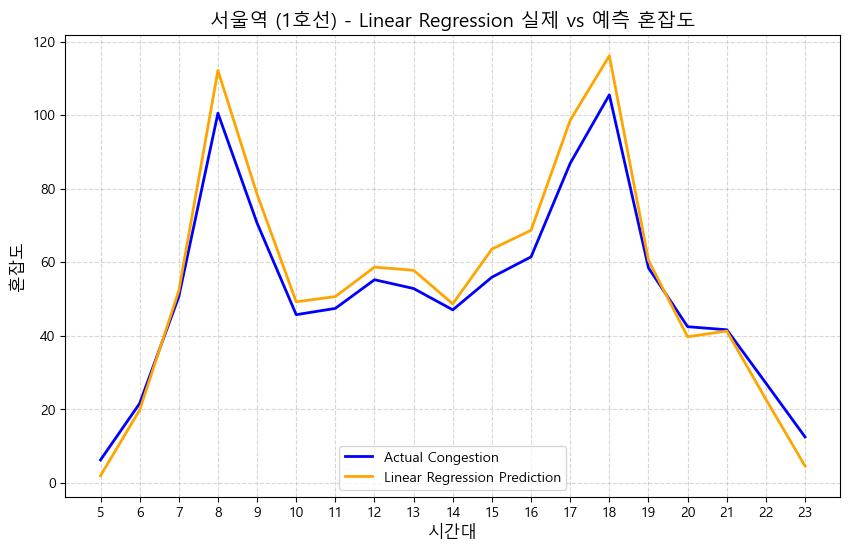

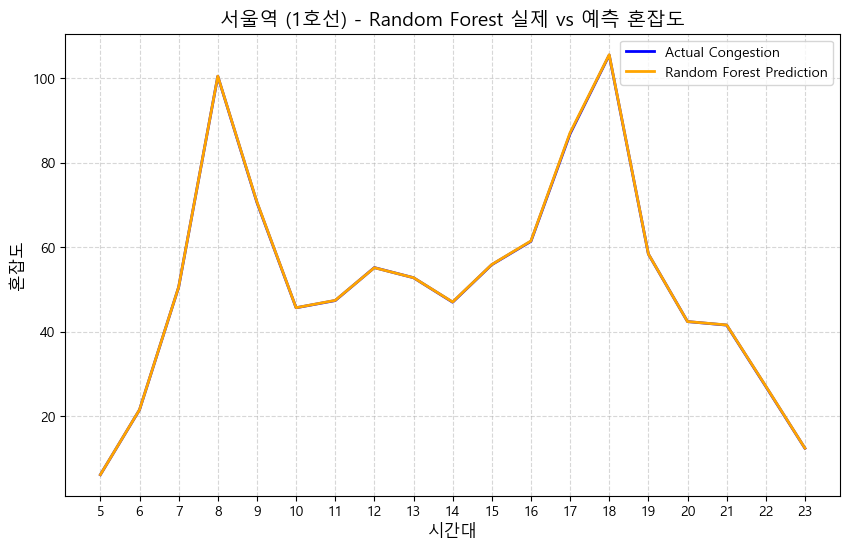

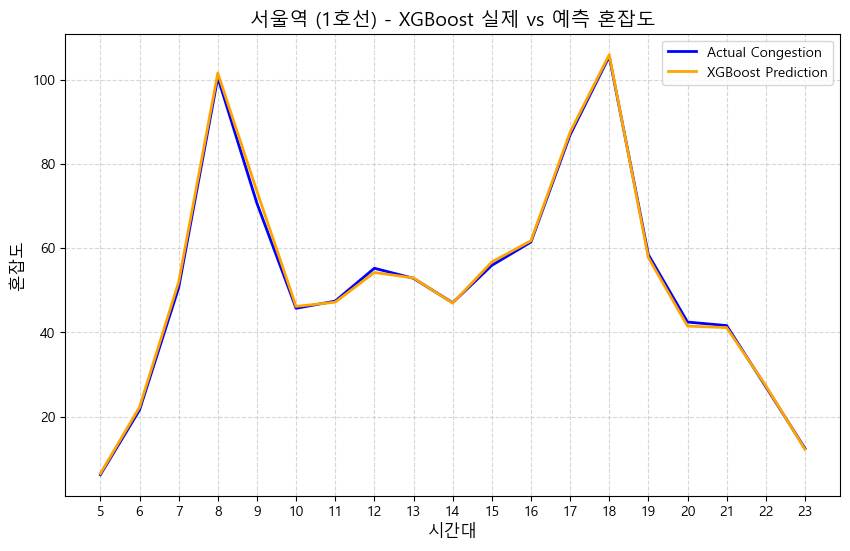

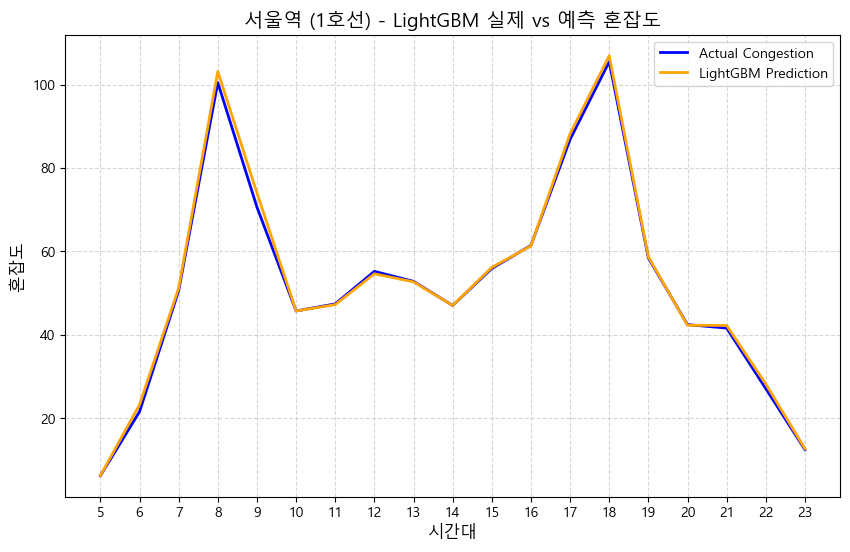

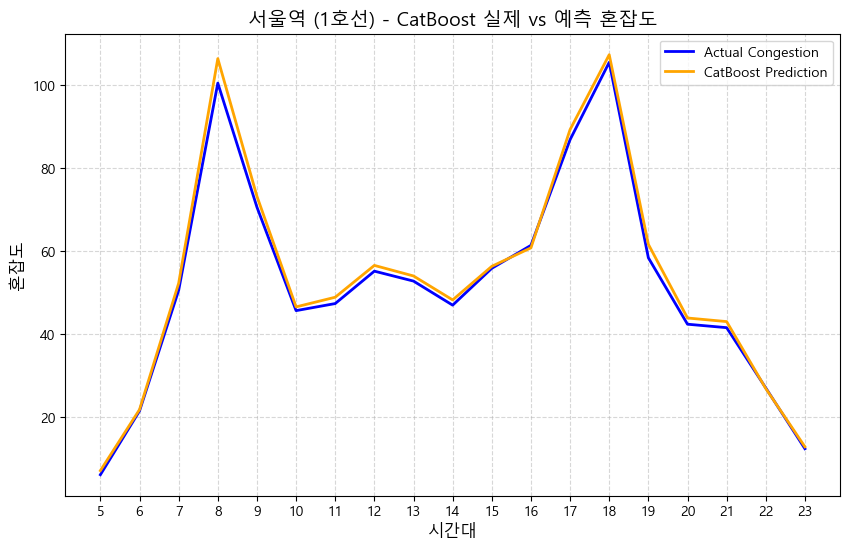

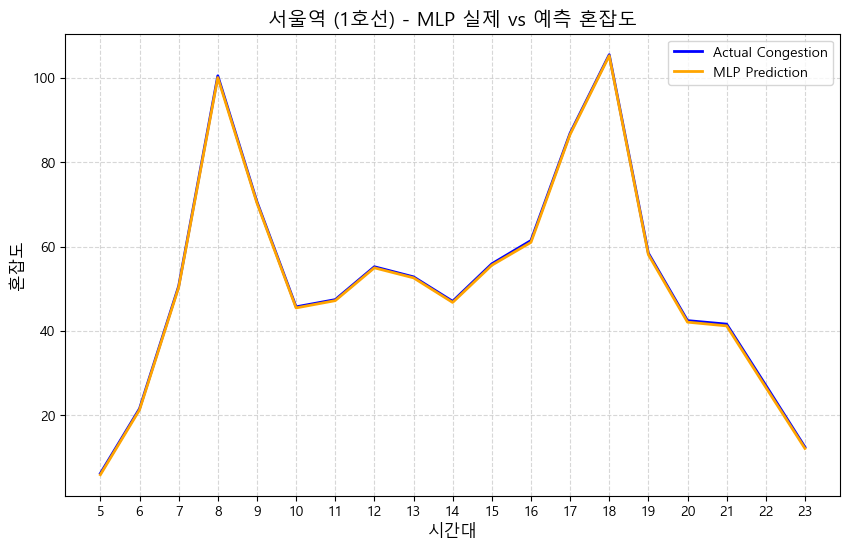

265/265 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step


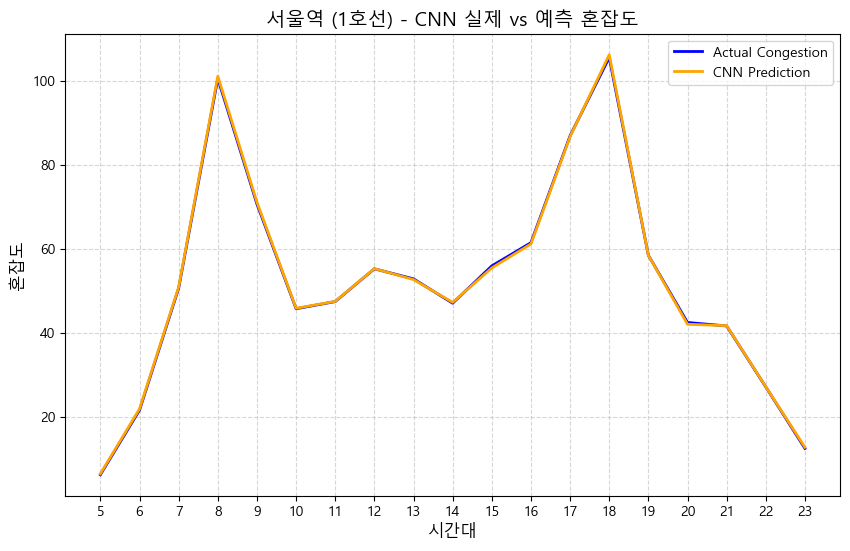

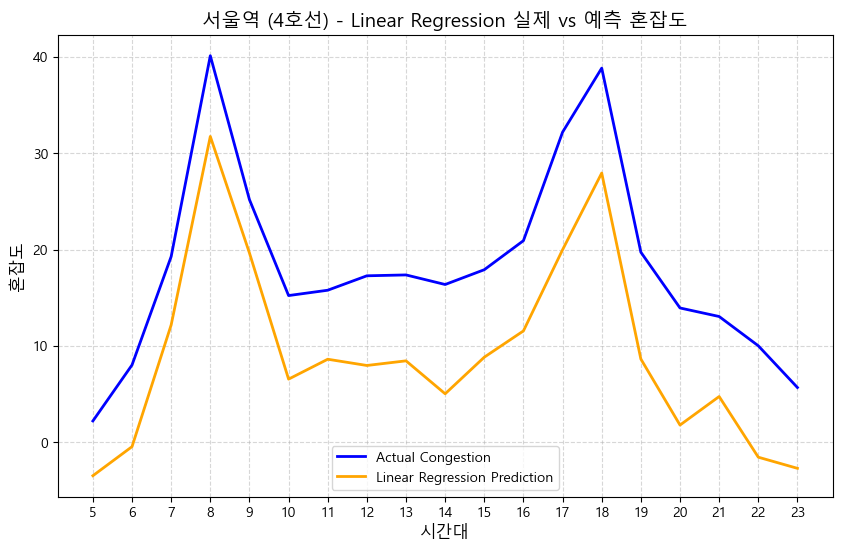

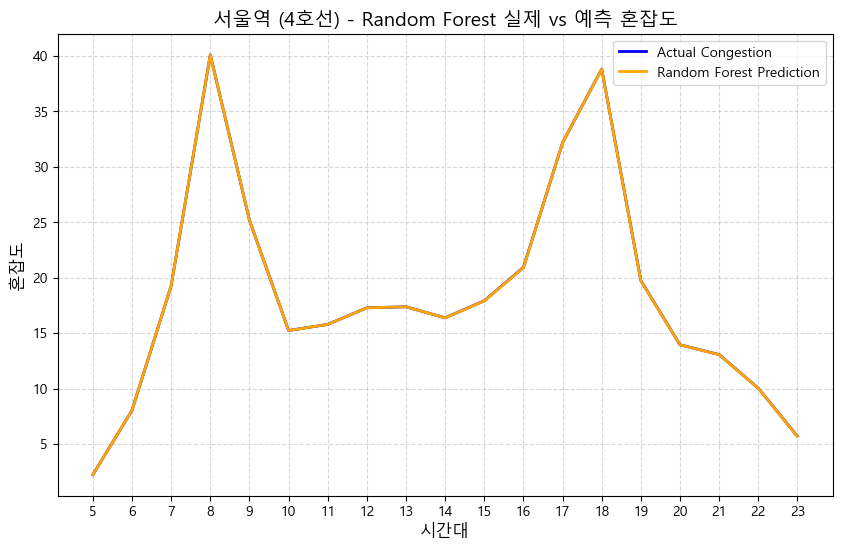

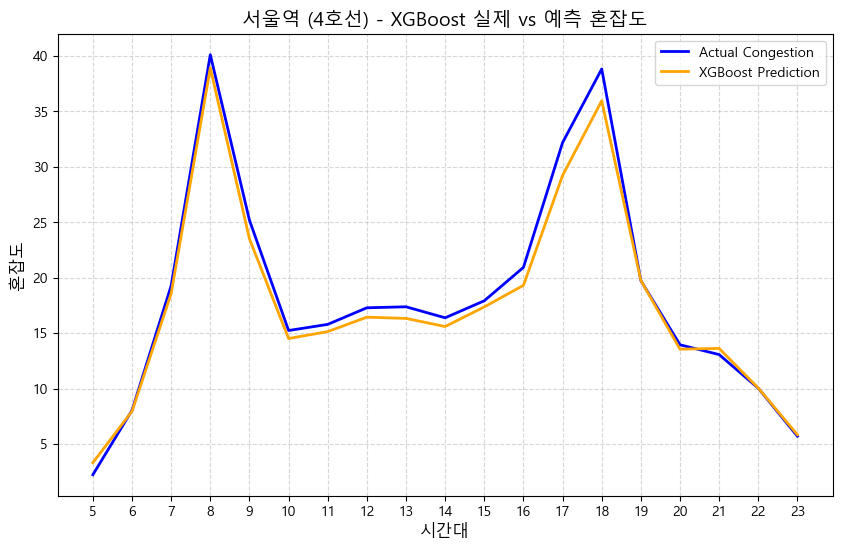

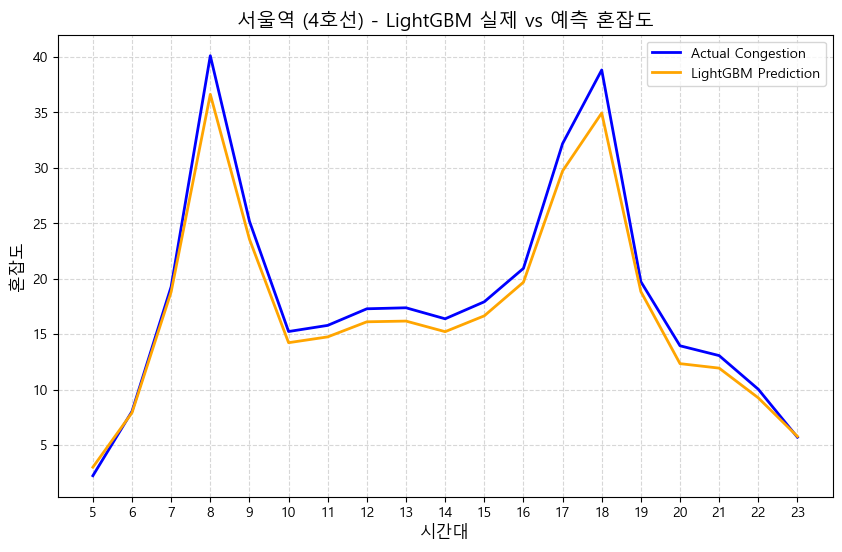

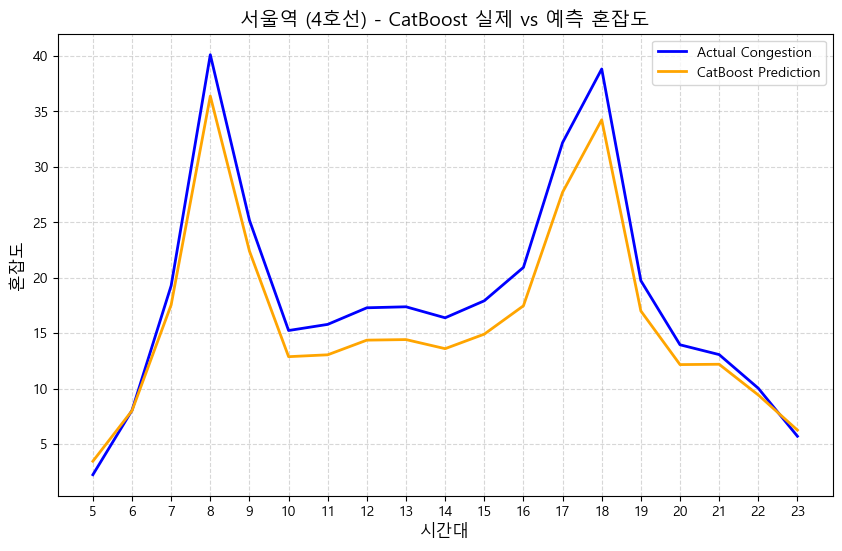

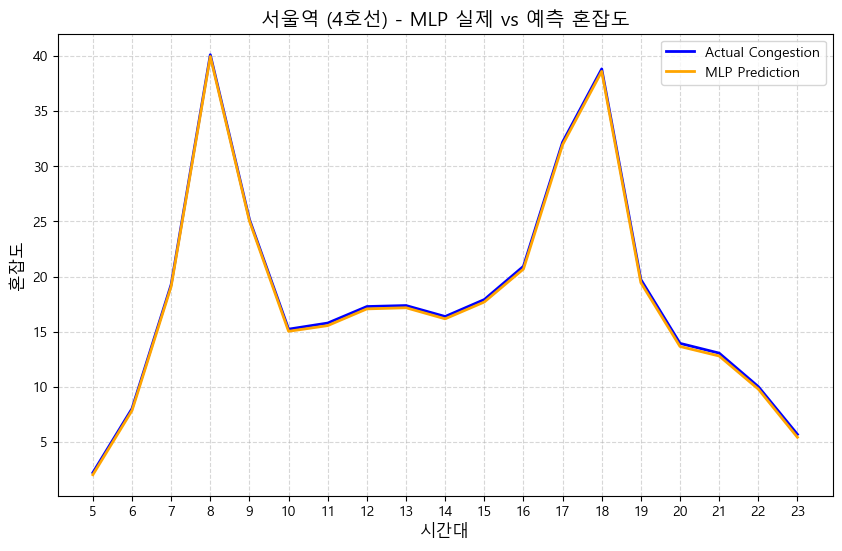

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step


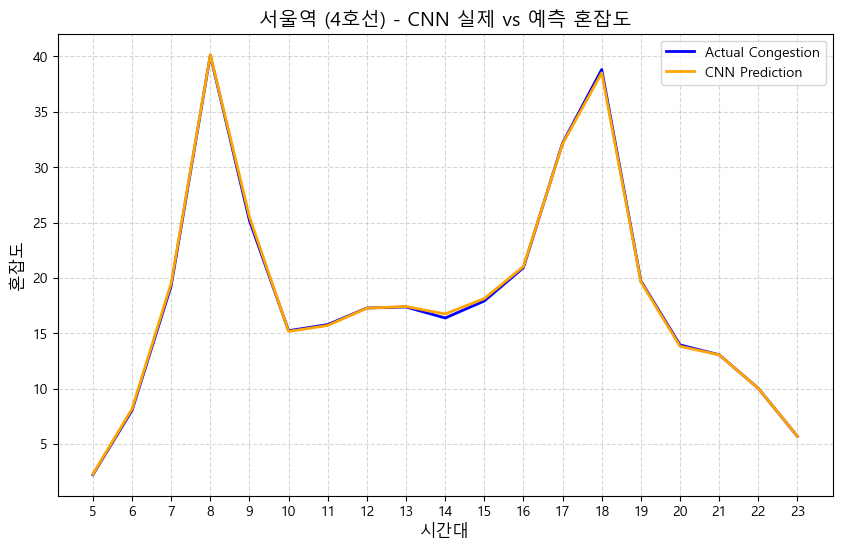

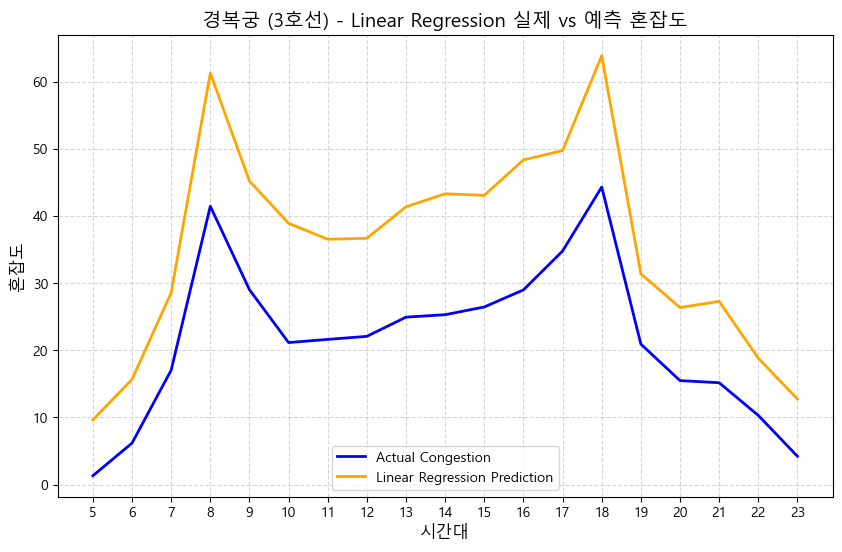

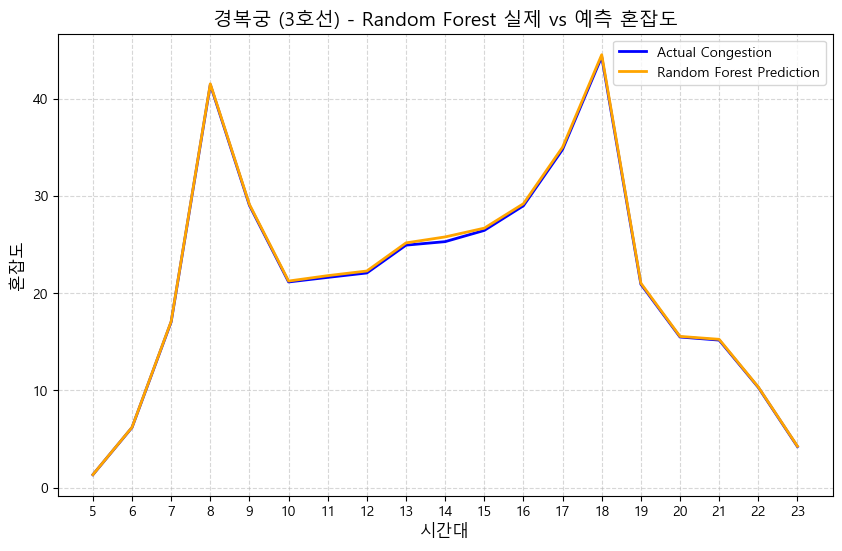

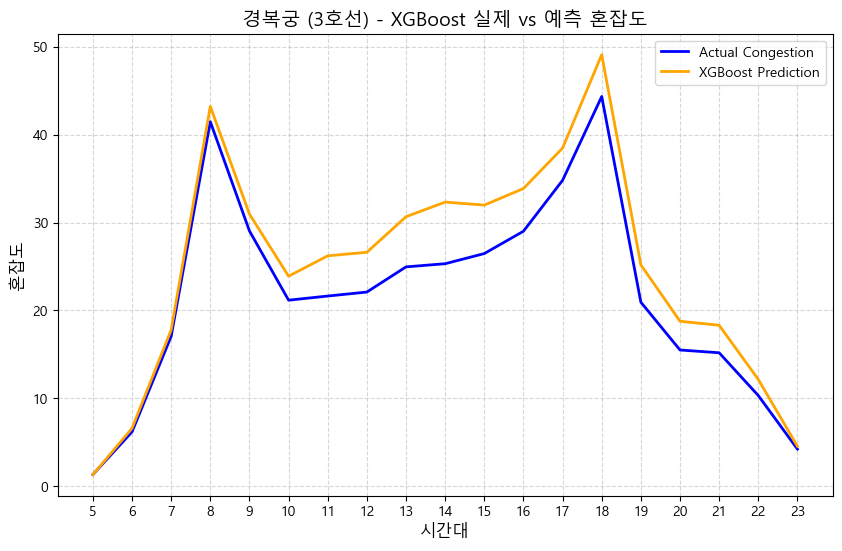

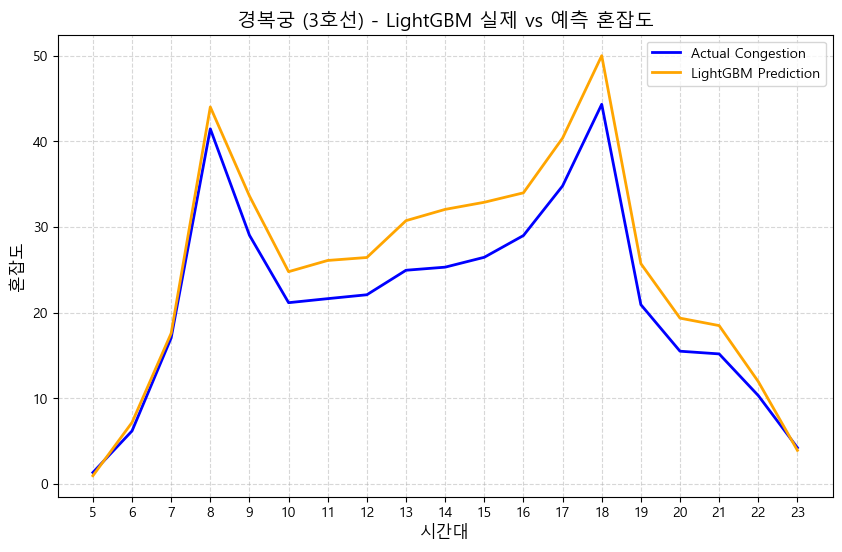

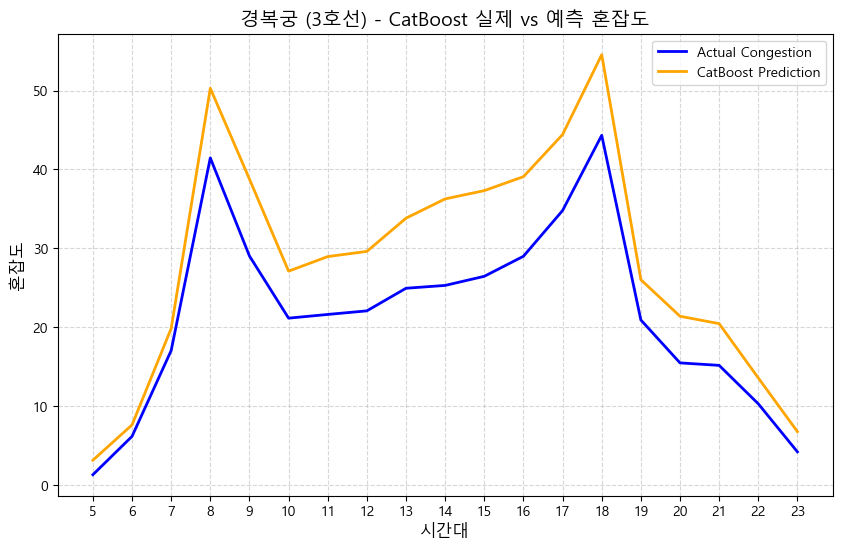

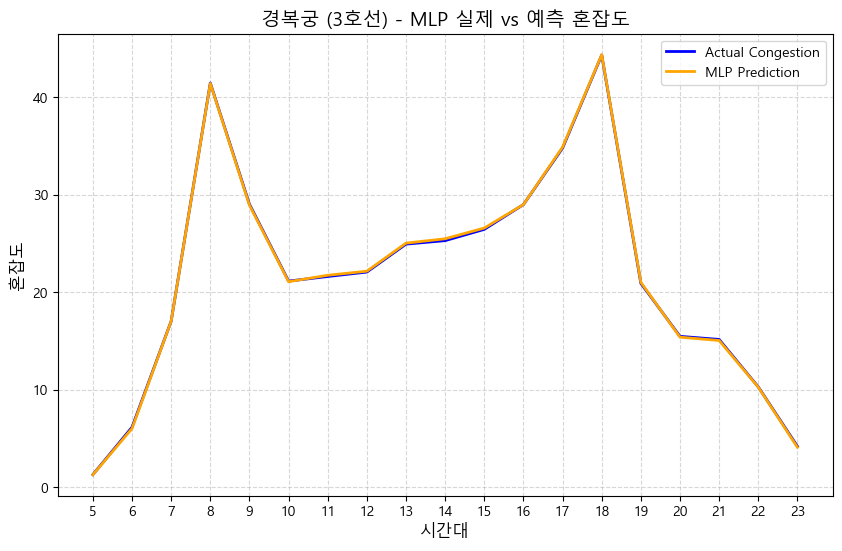

262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step


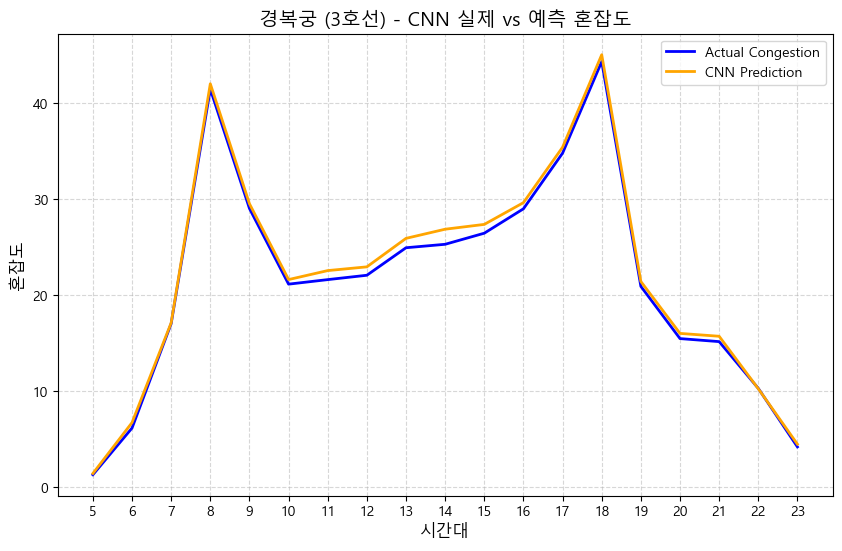

In [86]:
def plot_2d(station_name, line_number):
    
    station_data = data['df_test'][(data['df_test']['역명'] == station_name) & 
                                   (data['df_test']['호선'] == line_number)]
    
    # 시간대별 실제 혼잡도 평균 계산 및 정렬
    station_data = station_data.sort_values(by='시간')
    time_series = station_data['시간'].unique()
    actual_congestion = station_data.groupby('시간')['승강장혼잡도1'].mean()
    
    # 모델별 예측값 시각화
    for model_name, best_model in trained_models.items():
        try:
            X_test_station_scaled = data['scaler'].transform(station_data[data['feature_columns']])
            if model_name == 'CNN':
                X_test_model_input = X_test_station_scaled.reshape(-1, X_test_station_scaled.shape[1], 1)
            else:
                X_test_model_input = X_test_station_scaled

            # 예측
            Y_test_pred = best_model.predict(X_test_model_input)
            if model_name == 'CNN':
                Y_test_pred = Y_test_pred.flatten()
            
            # 시간대별 예측 값 평균 
            predicted_congestion = [Y_test_pred[station_data['시간'] == t].mean() for t in time_series]
            
            plt.figure(figsize=(10, 6))
            plt.plot(time_series, actual_congestion, label='Actual Congestion', color='blue', linewidth=2)
            plt.plot(time_series, predicted_congestion, label=f'{model_name} Prediction', color='orange', linewidth=2)
            plt.title(f'{station_name} ({line_number}호선) - {model_name} 실제 vs 예측 혼잡도', fontsize=14)
            plt.xlabel('시간대', fontsize=12)
            plt.ylabel('혼잡도', fontsize=12)
            plt.xticks(time_series)
            plt.grid(visible=True, linestyle='--', alpha=0.5)
            plt.legend()
            plt.show()
        except Exception as e:
            print(f"Error plotting predictions for {model_name}: {e}")

# 출력(서울역과 경복궁역)
plot_2d('서울역', 1)
plot_2d('서울역', 4)
plot_2d('경복궁', 3)

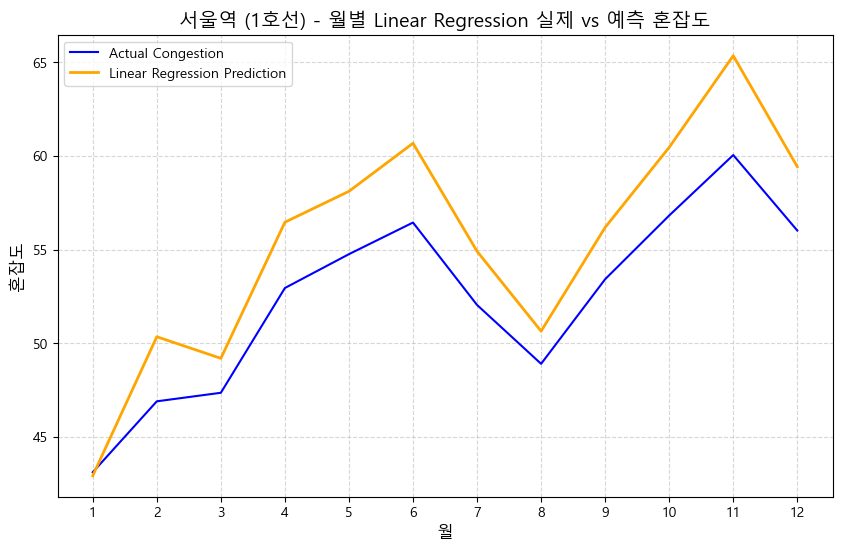

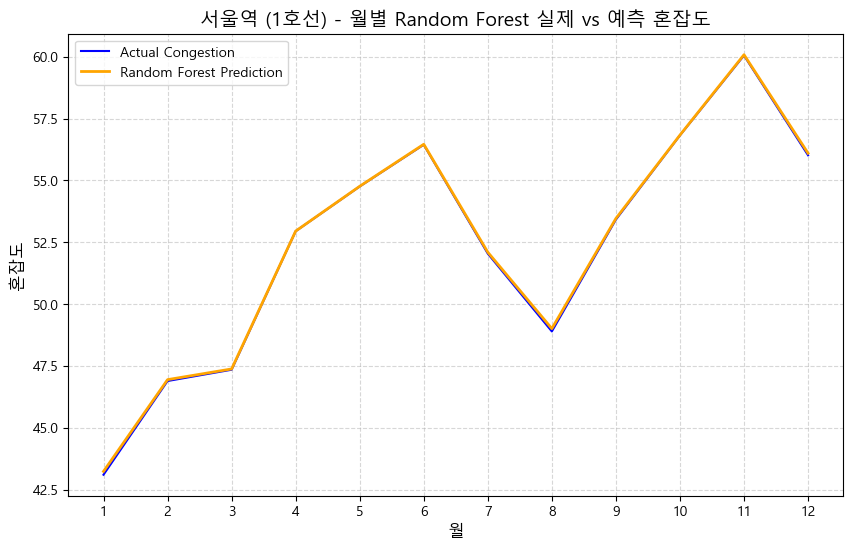

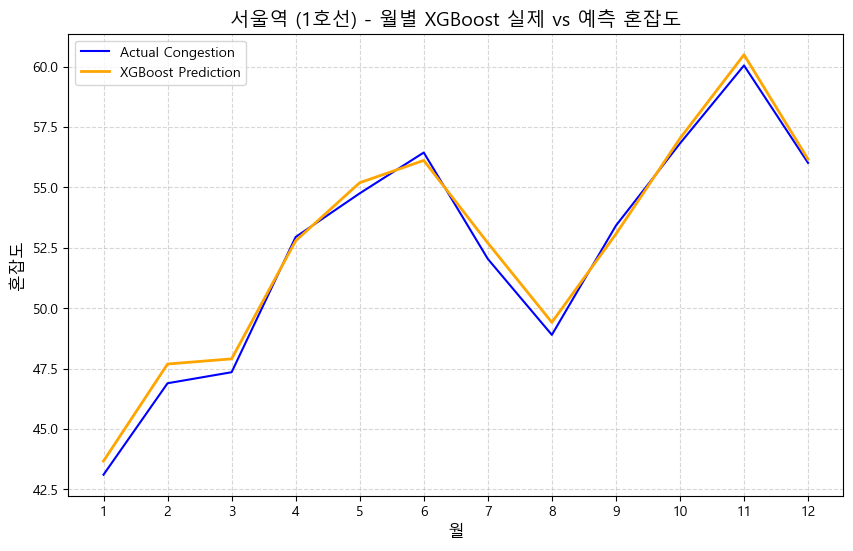

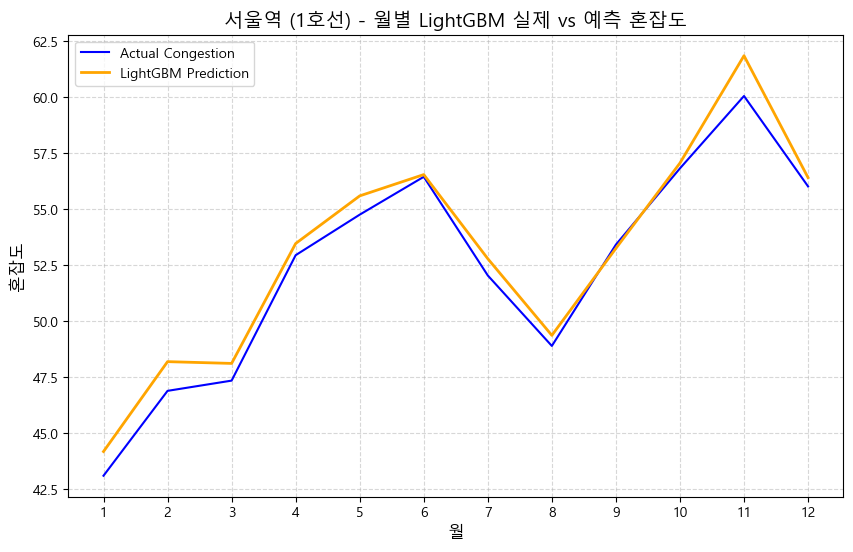

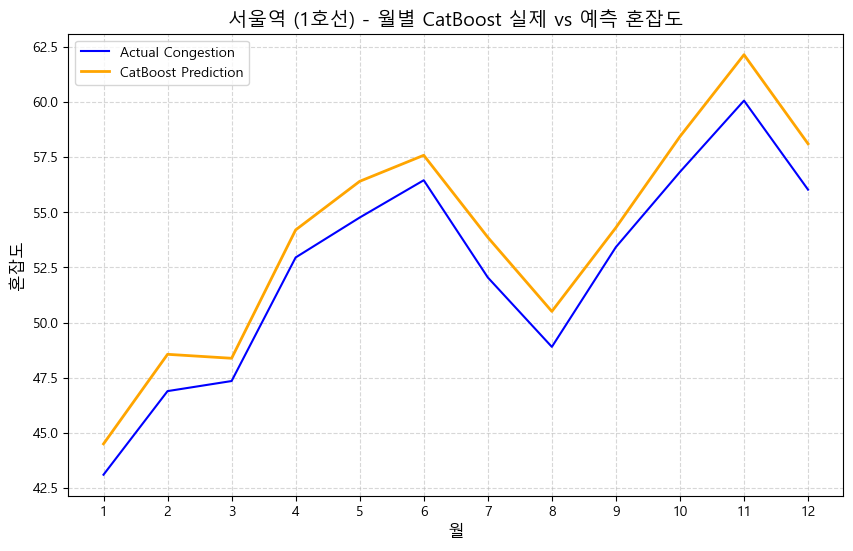

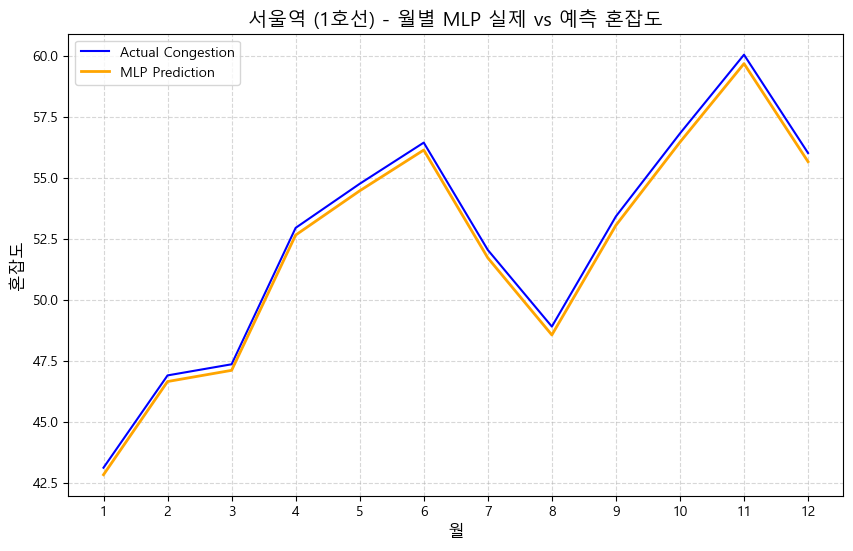

265/265 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


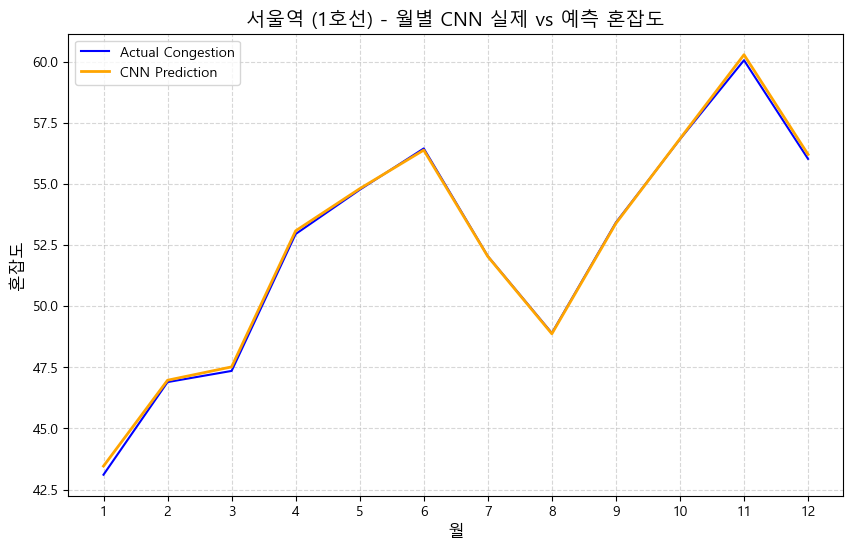

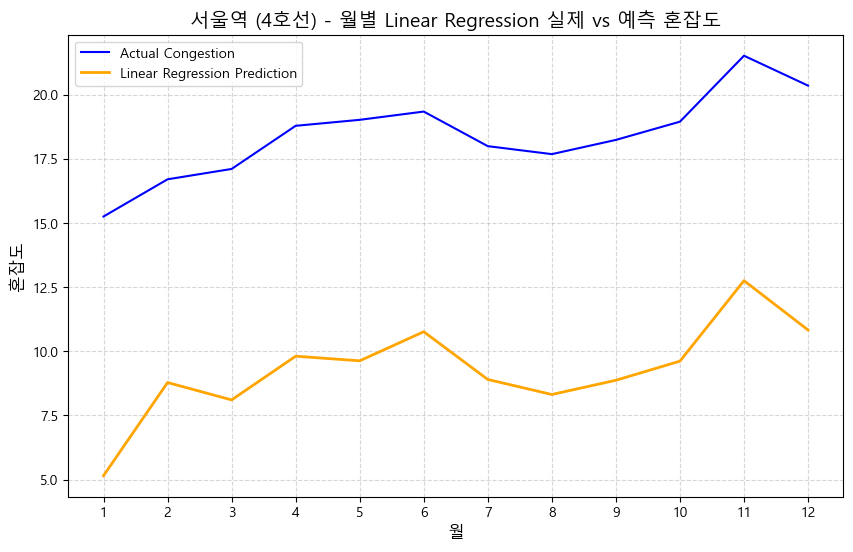

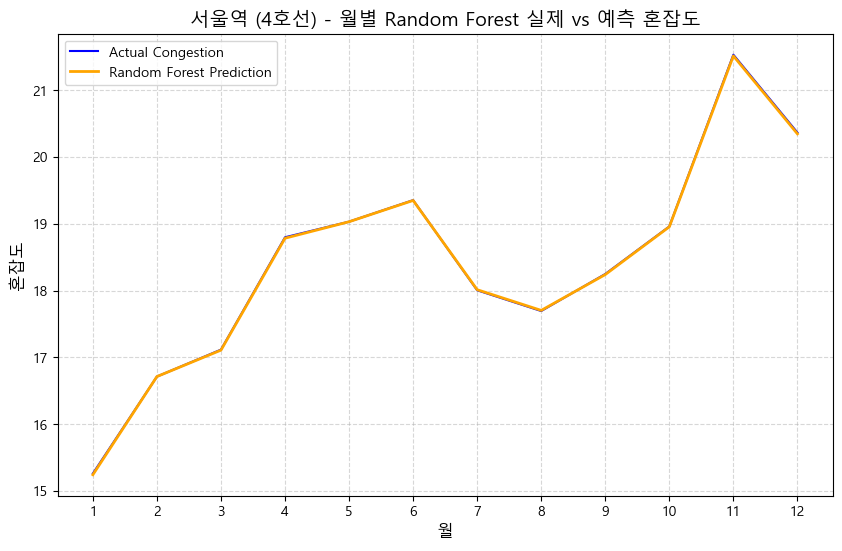

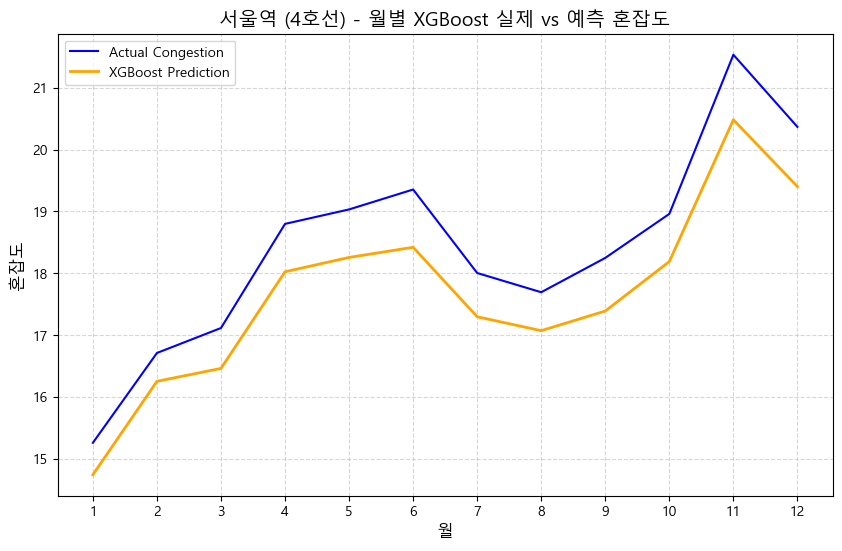

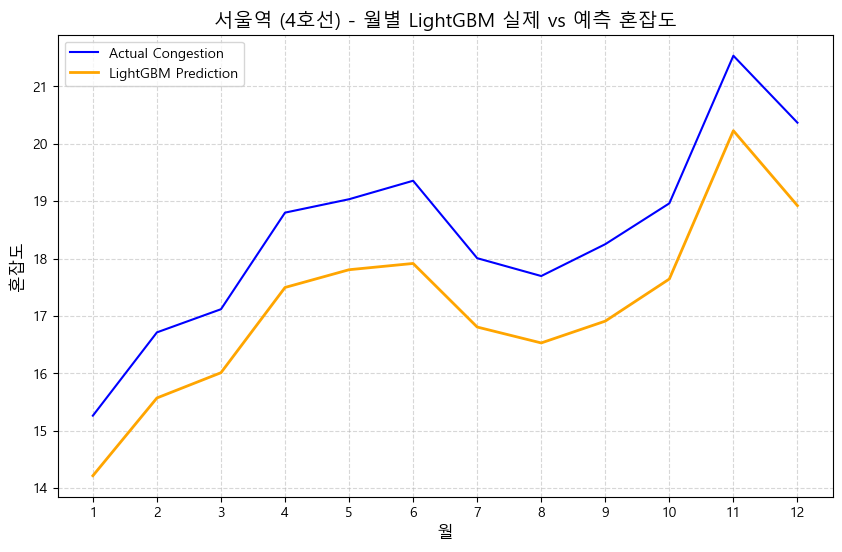

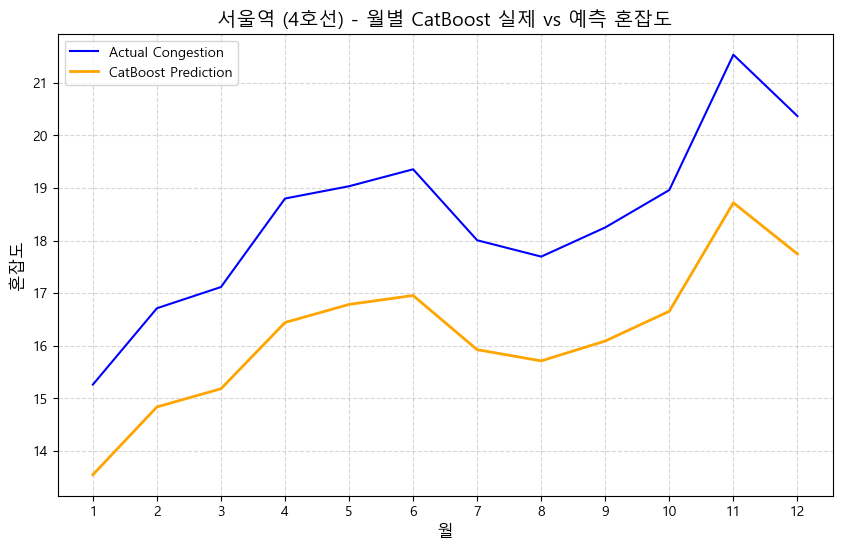

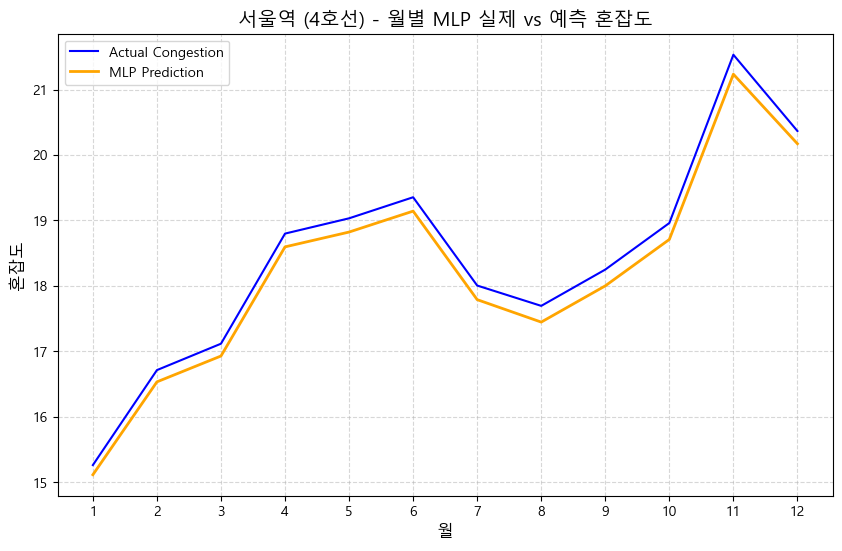

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step


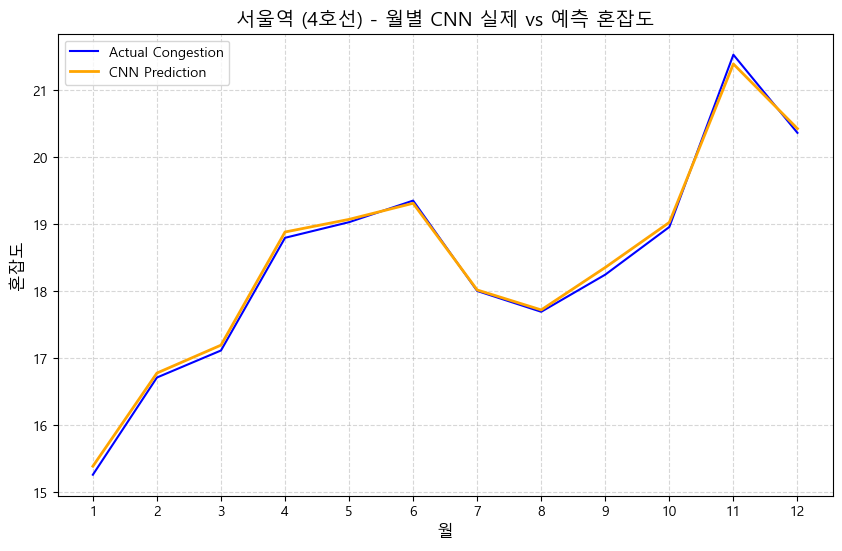

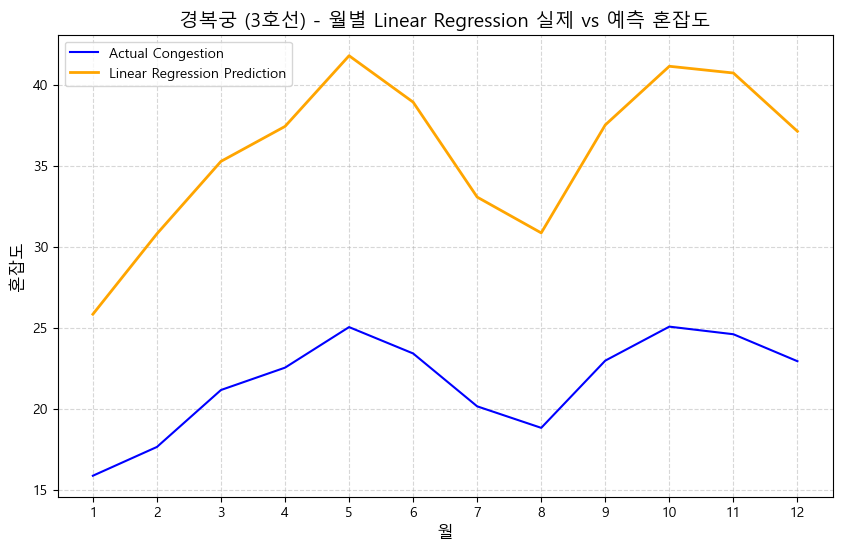

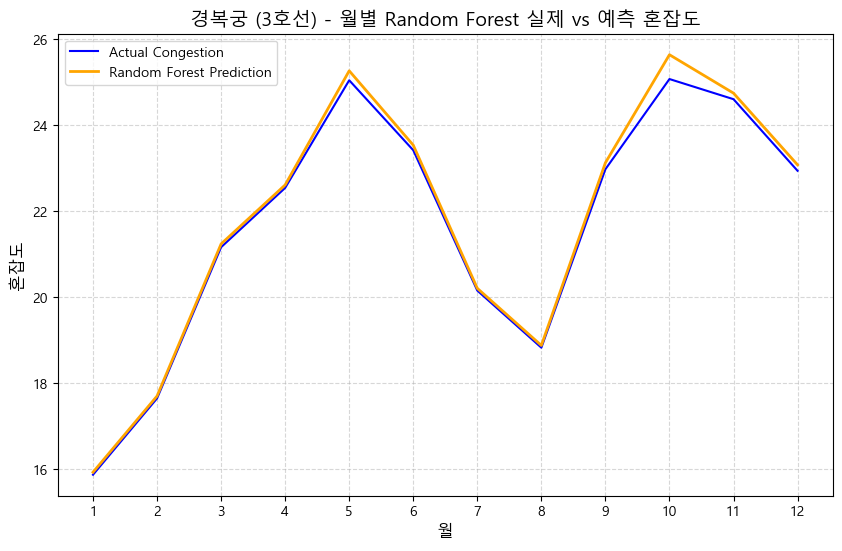

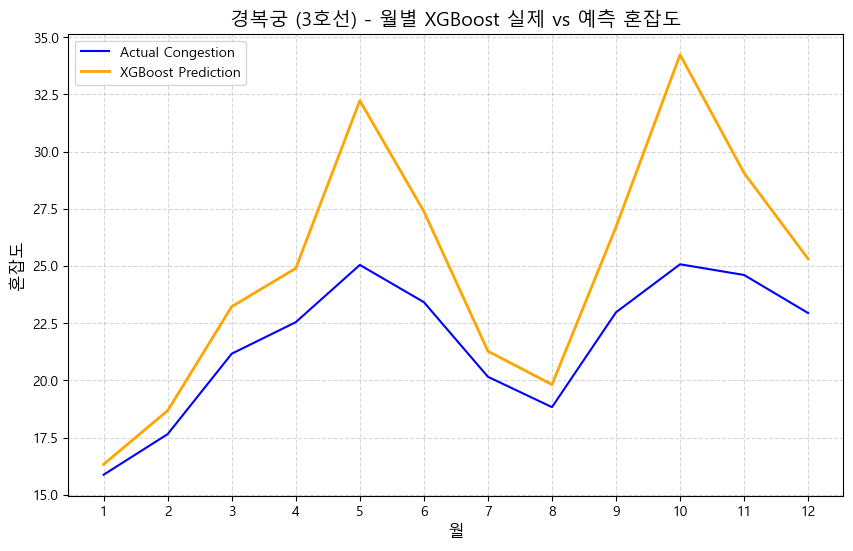

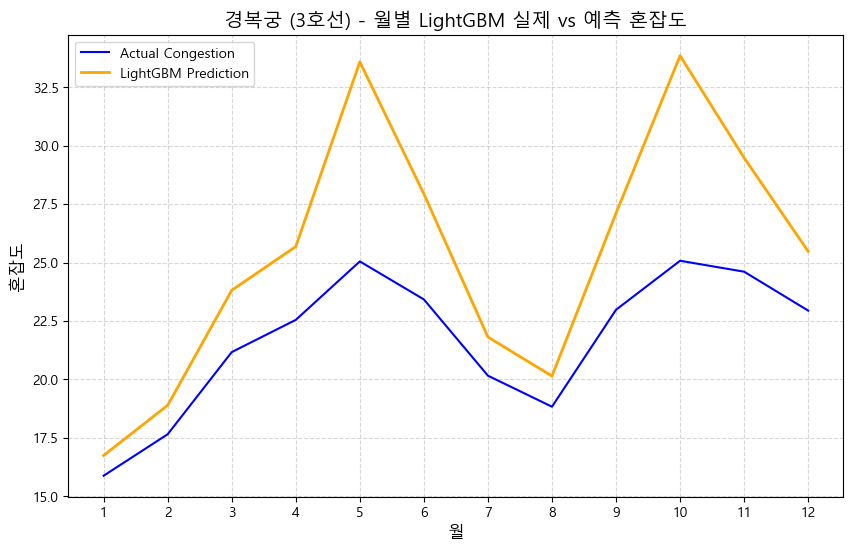

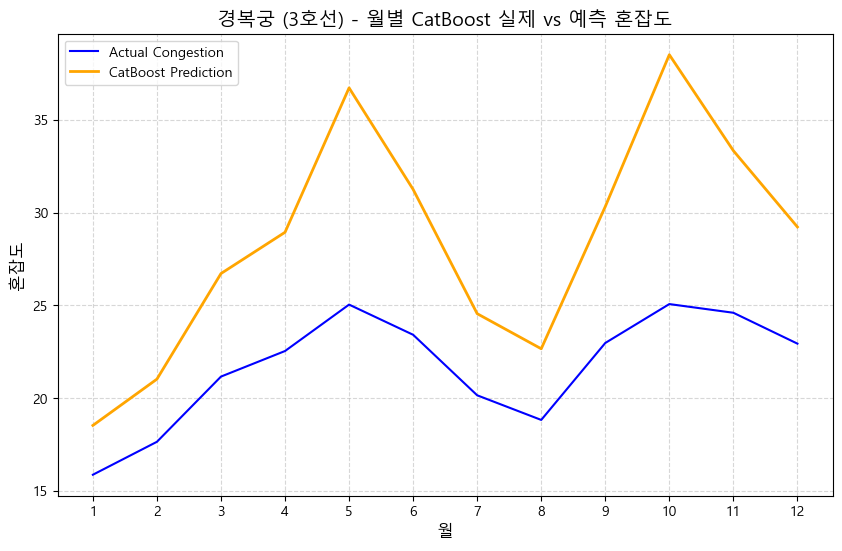

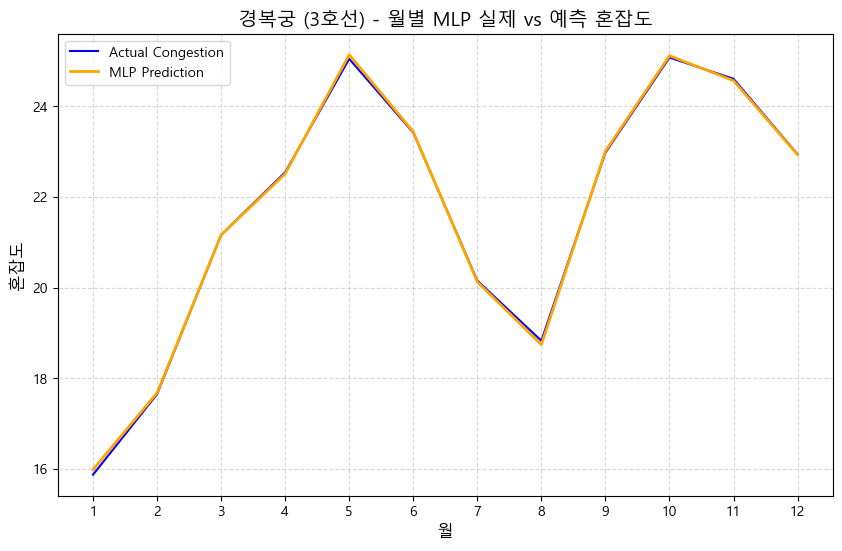

262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step


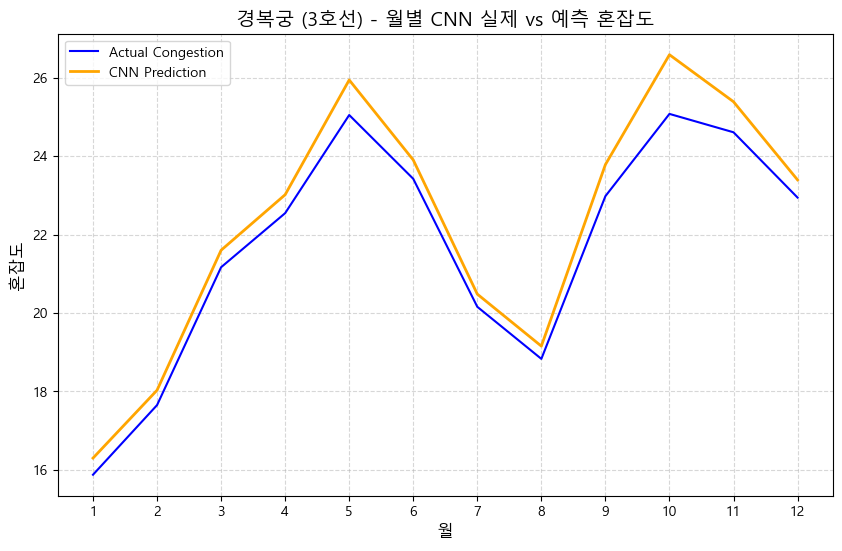

In [87]:
def plot_2d_2(station_name, line_number):
    station_data = data['df_test'][(data['df_test']['역명'] == station_name) & 
                                   (data['df_test']['호선'] == line_number)]
    
    # 순서대로 정렬
    station_data = station_data.sort_values(by='월')
    monthly_series = sorted(station_data['월'].unique())
    actual_congestion = station_data.groupby('월')['승강장혼잡도1'].mean()
    
    # 모델별 예측값 시각화
    for model_name, best_model in trained_models.items():
        try:
            X_test_station_scaled = data['scaler'].transform(station_data[data['feature_columns']])
            if model_name == 'CNN':
                X_test_model_input = X_test_station_scaled.reshape(-1, X_test_station_scaled.shape[1], 1)
            else:
                X_test_model_input = X_test_station_scaled

            # 예측
            Y_test_pred = best_model.predict(X_test_model_input)
            if model_name == 'CNN':
                Y_test_pred = Y_test_pred.flatten()
            
            # 월별 예측 값 평균 계산
            predicted_congestion = [Y_test_pred[station_data['월'] == month].mean() for month in monthly_series]
            
            plt.figure(figsize=(10, 6))
            plt.plot(monthly_series, actual_congestion, label='Actual Congestion', color='blue')
            plt.plot(monthly_series, predicted_congestion, label=f'{model_name} Prediction', color='orange', linewidth=2)
            plt.title(f'{station_name} ({line_number}호선) - 월별 {model_name} 실제 vs 예측 혼잡도', fontsize=14)
            plt.xlabel('월', fontsize=12)
            plt.ylabel('혼잡도', fontsize=12)
            plt.xticks(monthly_series)
            plt.grid(visible=True, linestyle='--', alpha=0.5)
            plt.legend()
            plt.show()
        except Exception as e:
            print(f"Error plotting predictions for {model_name}: {e}")

# 출력
plot_2d_2('서울역', 1)
plot_2d_2('서울역', 4)
plot_2d_2('경복궁', 3)

# 6. Shap 분석

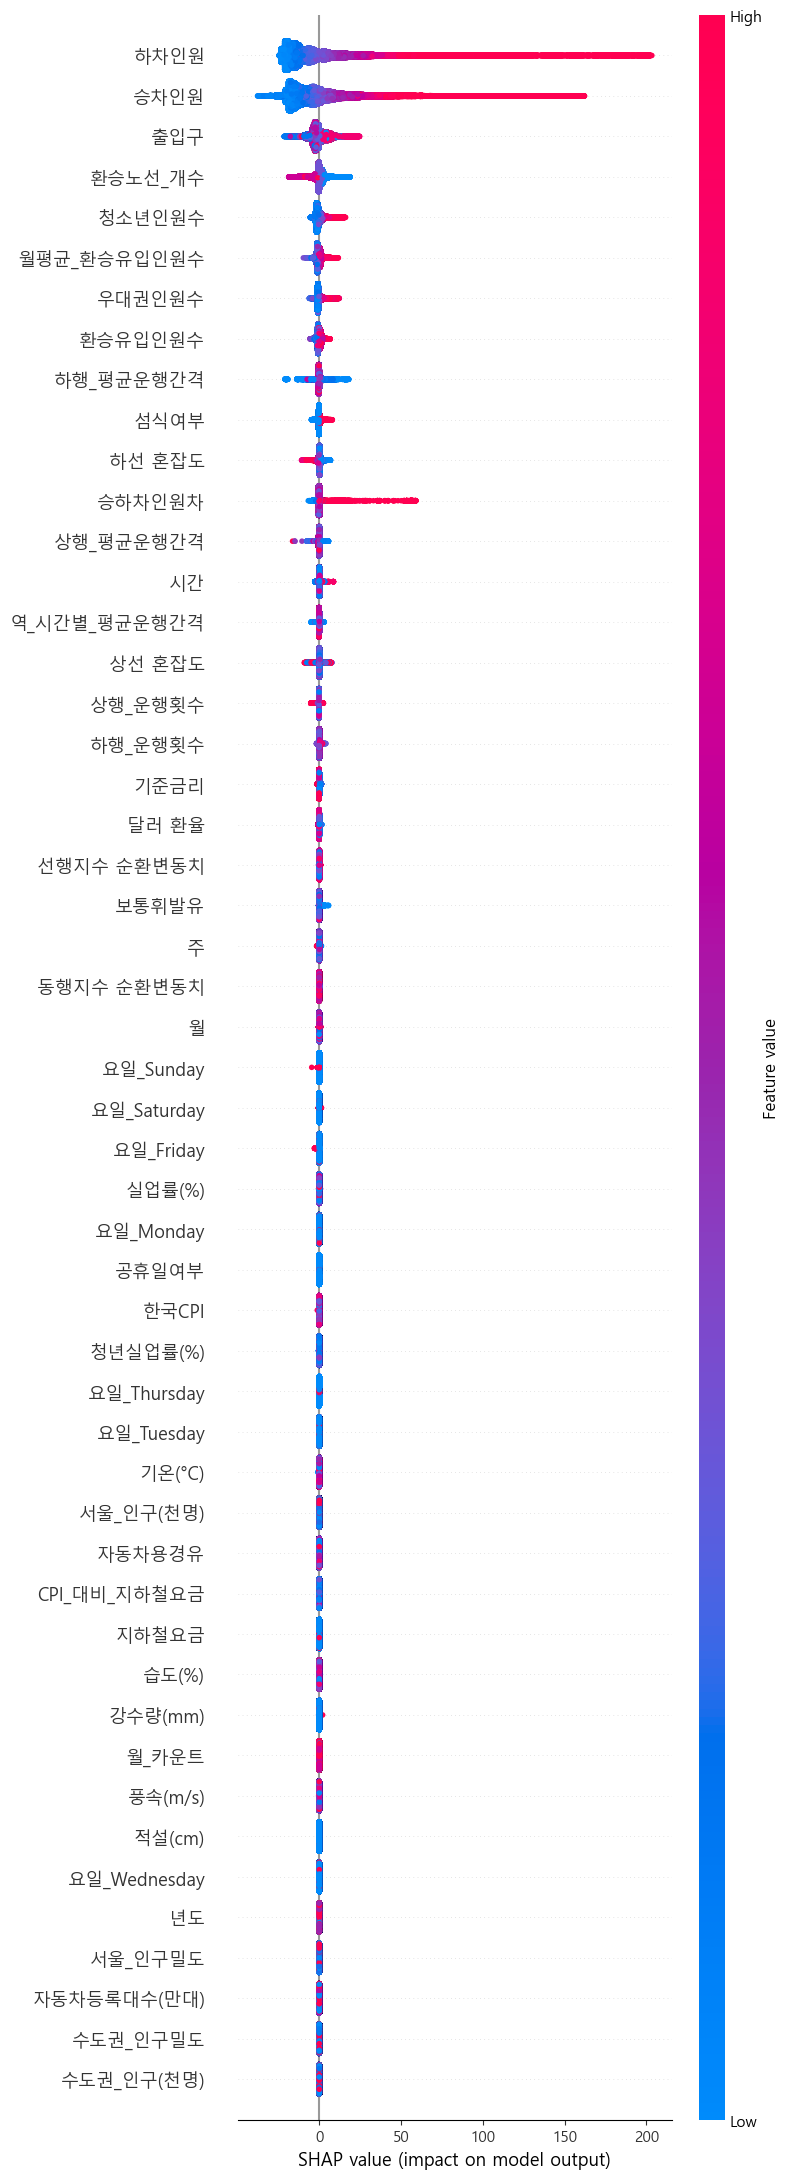

In [9]:
best_xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=0)
best_xgb_model.fit(data['X_train_scaled'], data['Y_train'])

# SHAP 분석
explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(data['X_test_scaled'])

# SHAP 요약 플롯
shap.summary_plot(shap_values, data['X_test'], feature_names=data['feature_columns'], max_display=100)

Displaying features 1 to 10:


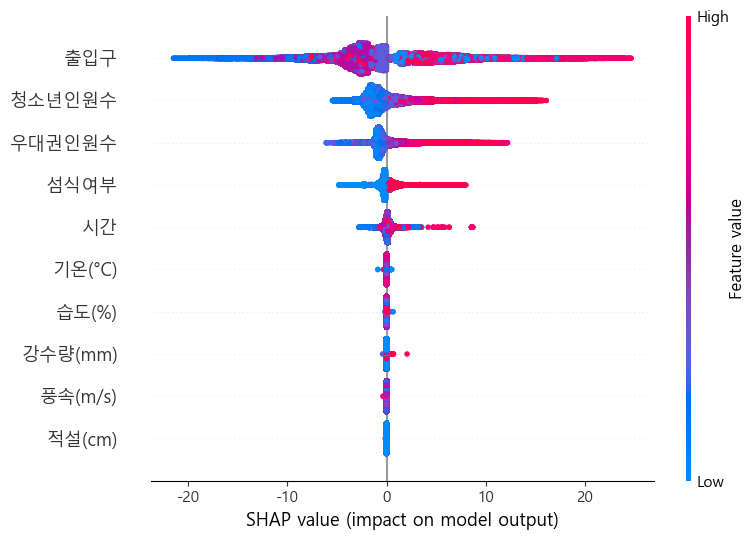

Displaying features 11 to 20:


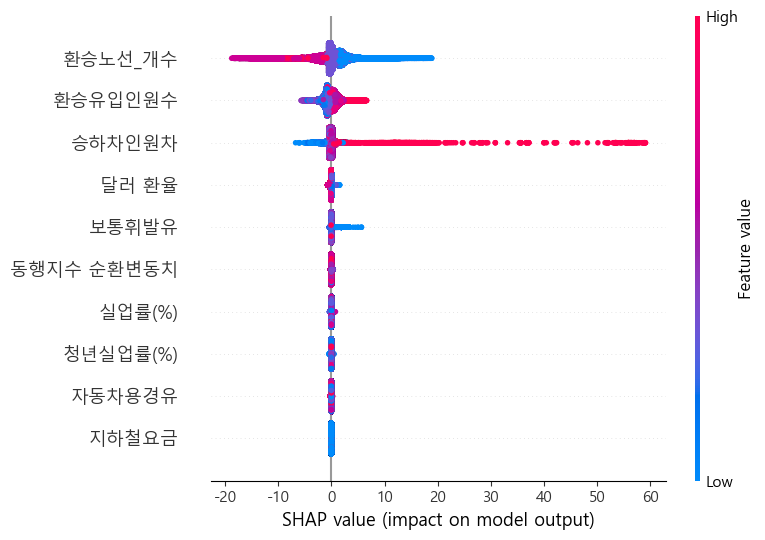

Displaying features 21 to 30:


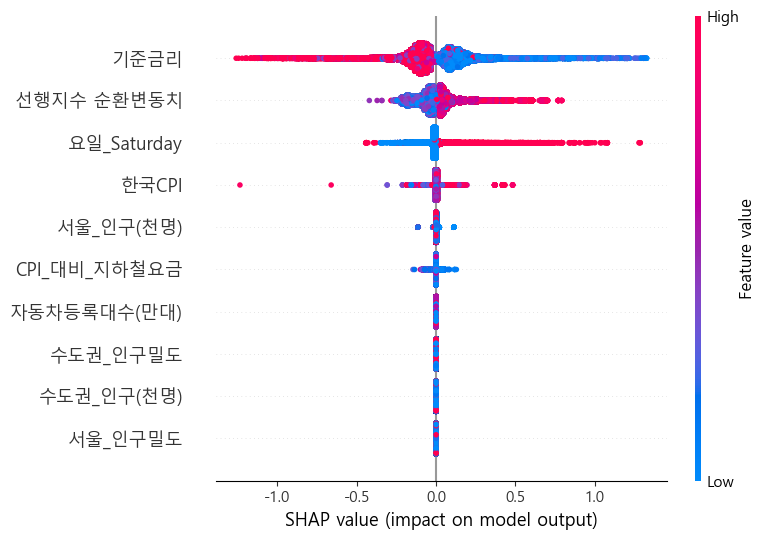

Displaying features 31 to 40:


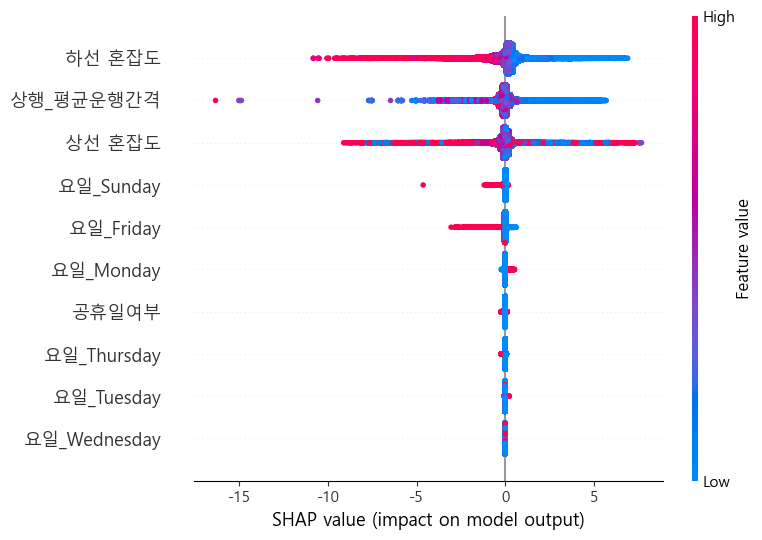

Displaying features 41 to 49:


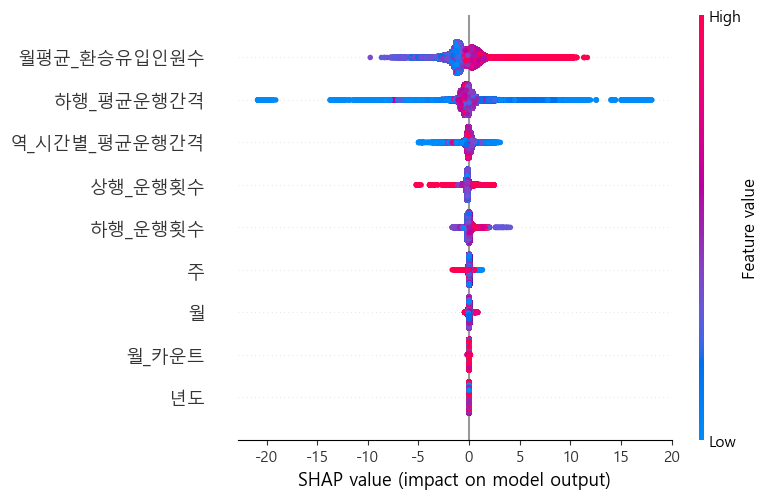

In [10]:
# 제외할 변수 목록
exclude_features = ['하차인원', '승차인원']

# 제외할 변수의 인덱스를 찾음
exclude_indices = [data['feature_columns'].index(feature) for feature in exclude_features]

# 제외한 SHAP 값 및 데이터 생성
shap_values_filtered = shap_values.copy()
shap_values_filtered = np.delete(shap_values_filtered, exclude_indices, axis=1)

# 제외 데이터셋 생성
X_test_filtered = data['X_test'].copy()
X_test_filtered = X_test_filtered.drop(columns=exclude_features)

# 슬라이스
feature_names = X_test_filtered.columns.tolist()
num_features = len(feature_names)
batch_size = 10  

for i in range(0, num_features, batch_size):
    sliced_feature_names = feature_names[i:i + batch_size]
    sliced_shap_values = shap_values_filtered[:, i:i + batch_size]

    # 10개씩 
    print(f"Displaying features {i + 1} to {min(i + batch_size, num_features)}:")
    shap.summary_plot(sliced_shap_values, X_test_filtered[sliced_feature_names], feature_names=sliced_feature_names)


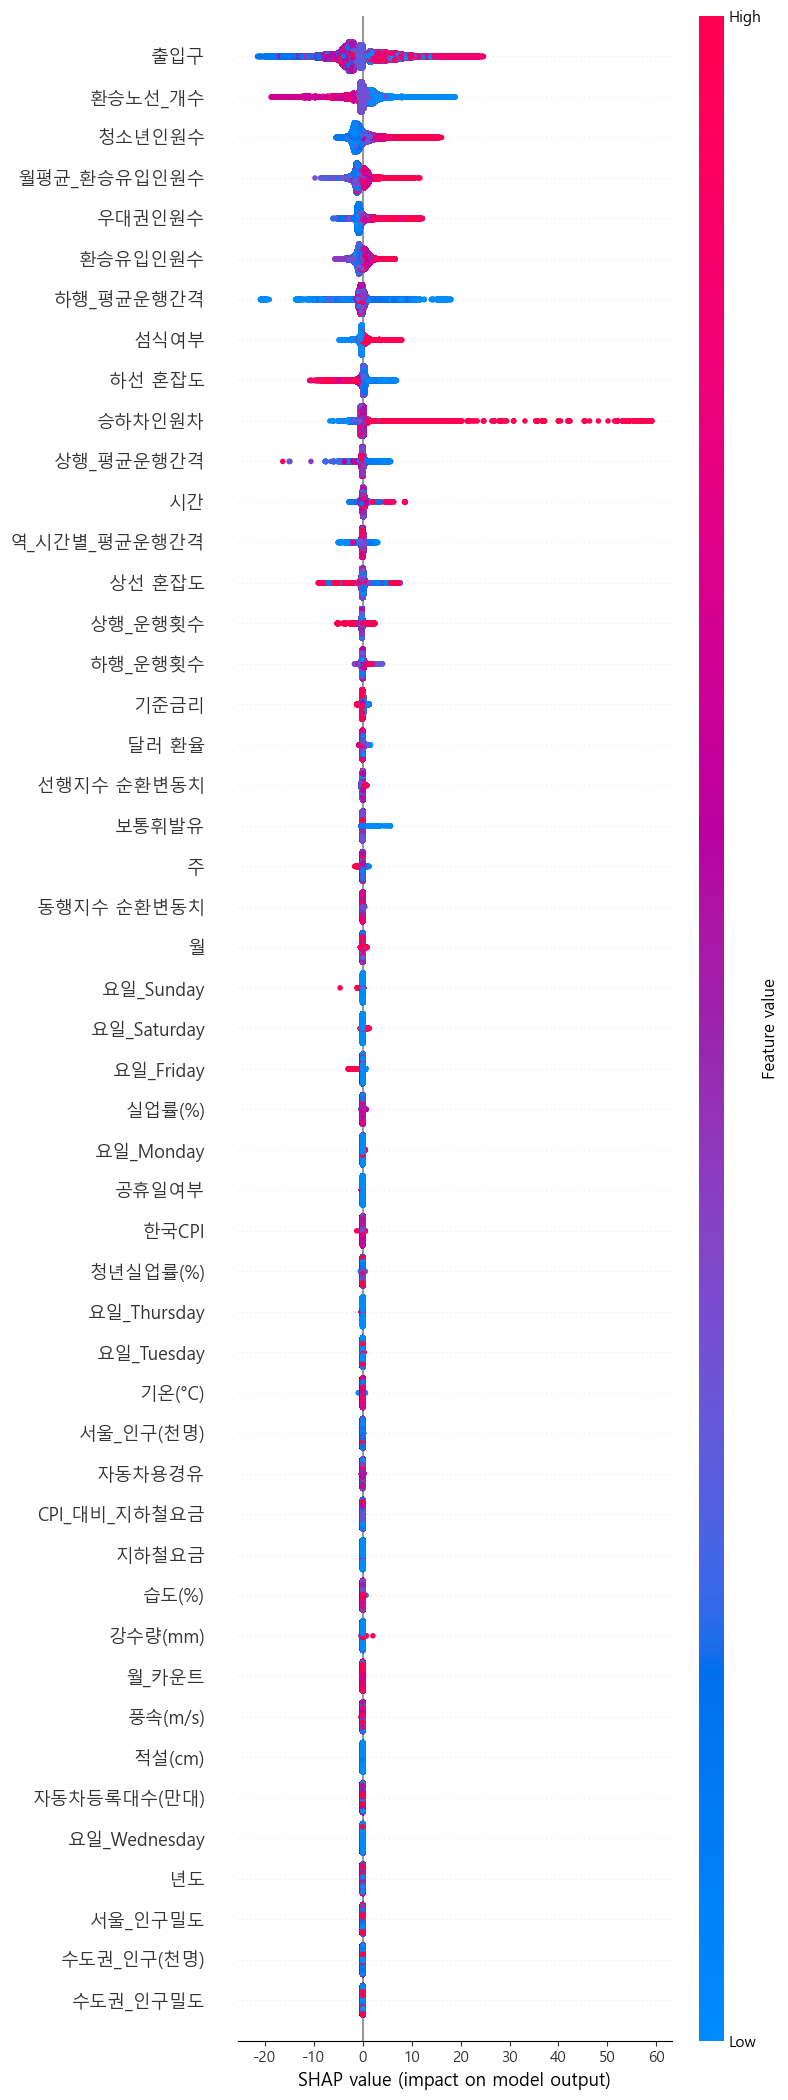

In [9]:
# 제외할 변수 목록
exclude_features = ['하차인원', '승차인원']

# 제외할 변수의 인덱스를 찾음
exclude_indices = [data['feature_columns'].index(feature) for feature in exclude_features]

# 제외한 SHAP 값 및 데이터 생성
shap_values_filtered = shap_values.copy()
shap_values_filtered = np.delete(shap_values_filtered, exclude_indices, axis=1)

# 제외한 데이터셋 생성
X_test_filtered = data['X_test'].copy()
X_test_filtered = X_test_filtered.drop(columns=exclude_features)

# 제외된 변수를 반영한 SHAP 요약 플롯
shap.summary_plot(shap_values_filtered, X_test_filtered, feature_names=X_test_filtered.columns.tolist(), max_display=100)

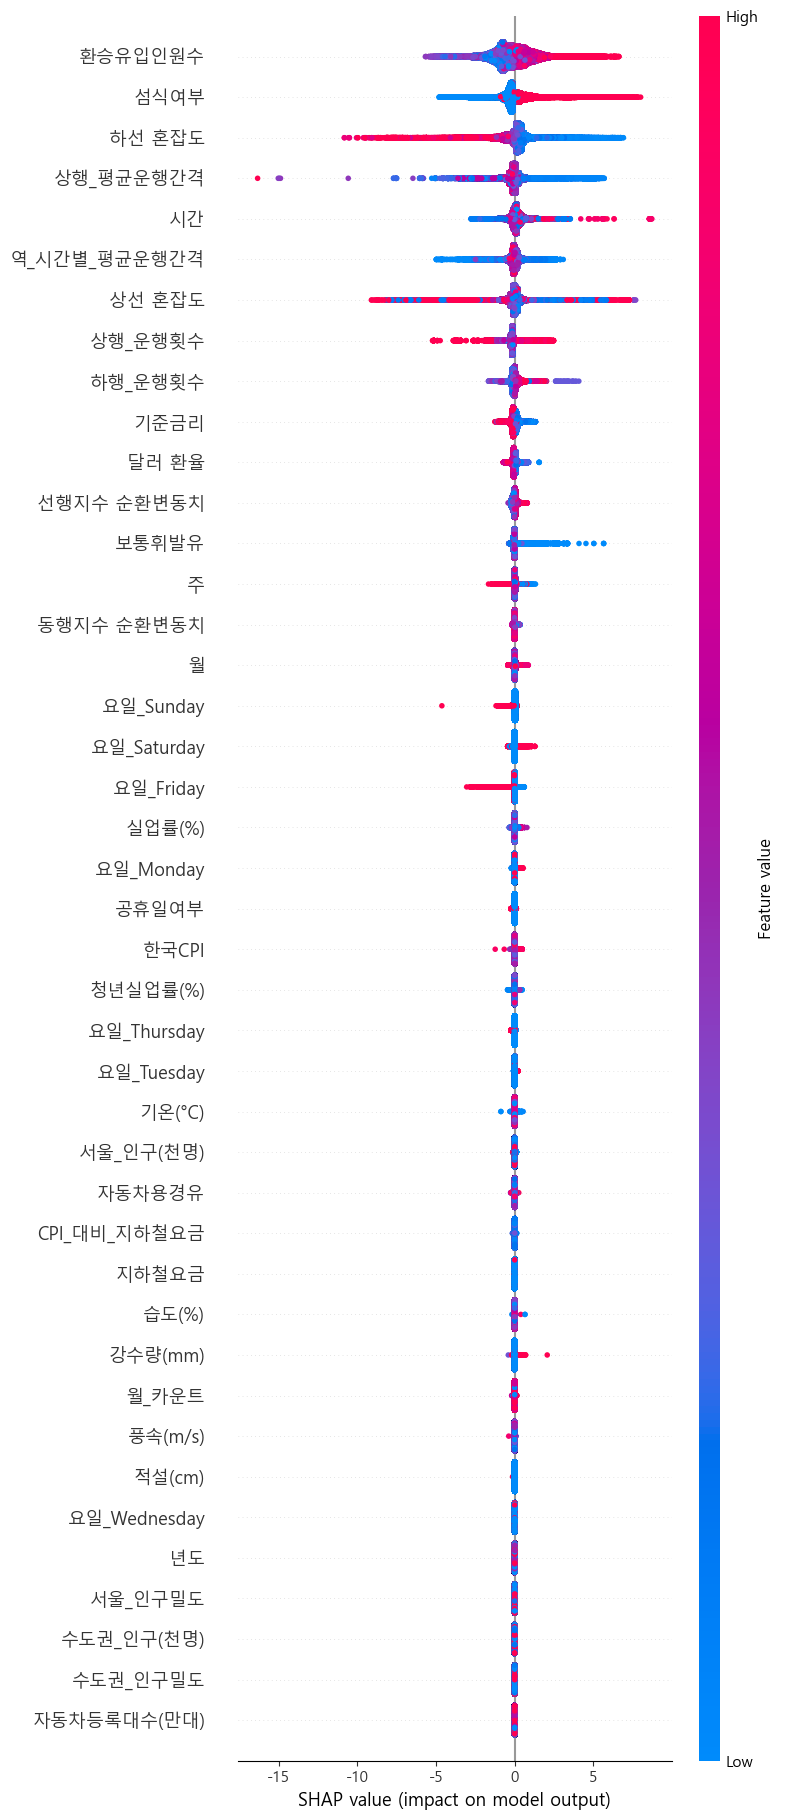

In [10]:
# 제외할 변수 목록
exclude_features = ['하차인원', '승차인원', '승하차인원차','출입구', '환승노선_개수', '청소년인원수', '월평균_환승유입인원수', '우대권인원수','하행_평균운행간격']

# 제외할 변수의 인덱스를 찾음
exclude_indices = [data['feature_columns'].index(feature) for feature in exclude_features]

# 제외한 SHAP 값 및 데이터 생성
shap_values_filtered = shap_values.copy()
shap_values_filtered = np.delete(shap_values_filtered, exclude_indices, axis=1)

# 제외한 데이터셋 생성
X_test_filtered = data['X_test'].copy()
X_test_filtered = X_test_filtered.drop(columns=exclude_features)

# 제외된 변수를 반영한 SHAP 요약 플롯
shap.summary_plot(shap_values_filtered, X_test_filtered, feature_names=X_test_filtered.columns.tolist(), max_display=100)


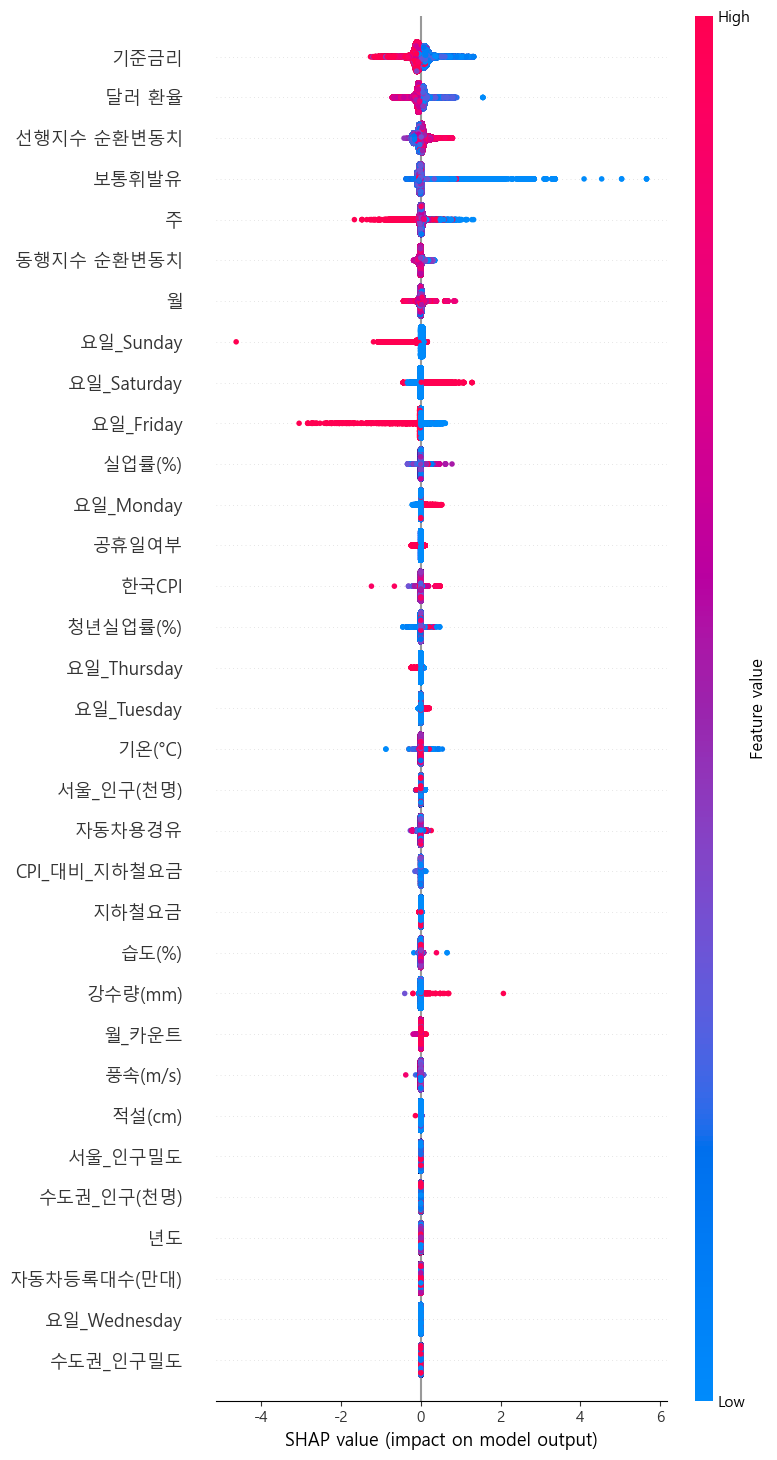

In [12]:
# 제외할 변수 목록
exclude_features = ['하차인원', '승차인원', '승하차인원차','출입구', '환승노선_개수', '청소년인원수', '월평균_환승유입인원수', '우대권인원수','하행_평균운행간격'
                   , '환승유입인원수','섬식여부','하선 혼잡도', '상행_평균운행간격','시간','역_시간별_평균운행간격','상선 혼잡도','상행_운행횟수','하행_운행횟수']

# 제외할 변수의 인덱스를 찾음
exclude_indices = [data['feature_columns'].index(feature) for feature in exclude_features]

# 제외한 SHAP 값 및 데이터 생성
shap_values_filtered = shap_values.copy()
shap_values_filtered = np.delete(shap_values_filtered, exclude_indices, axis=1)

# 제외한 데이터셋 생성
X_test_filtered = data['X_test'].copy()
X_test_filtered = X_test_filtered.drop(columns=exclude_features)

# 제외된 변수를 반영한 SHAP 요약 플롯
shap.summary_plot(shap_values_filtered, X_test_filtered, feature_names=X_test_filtered.columns.tolist(), max_display=100)


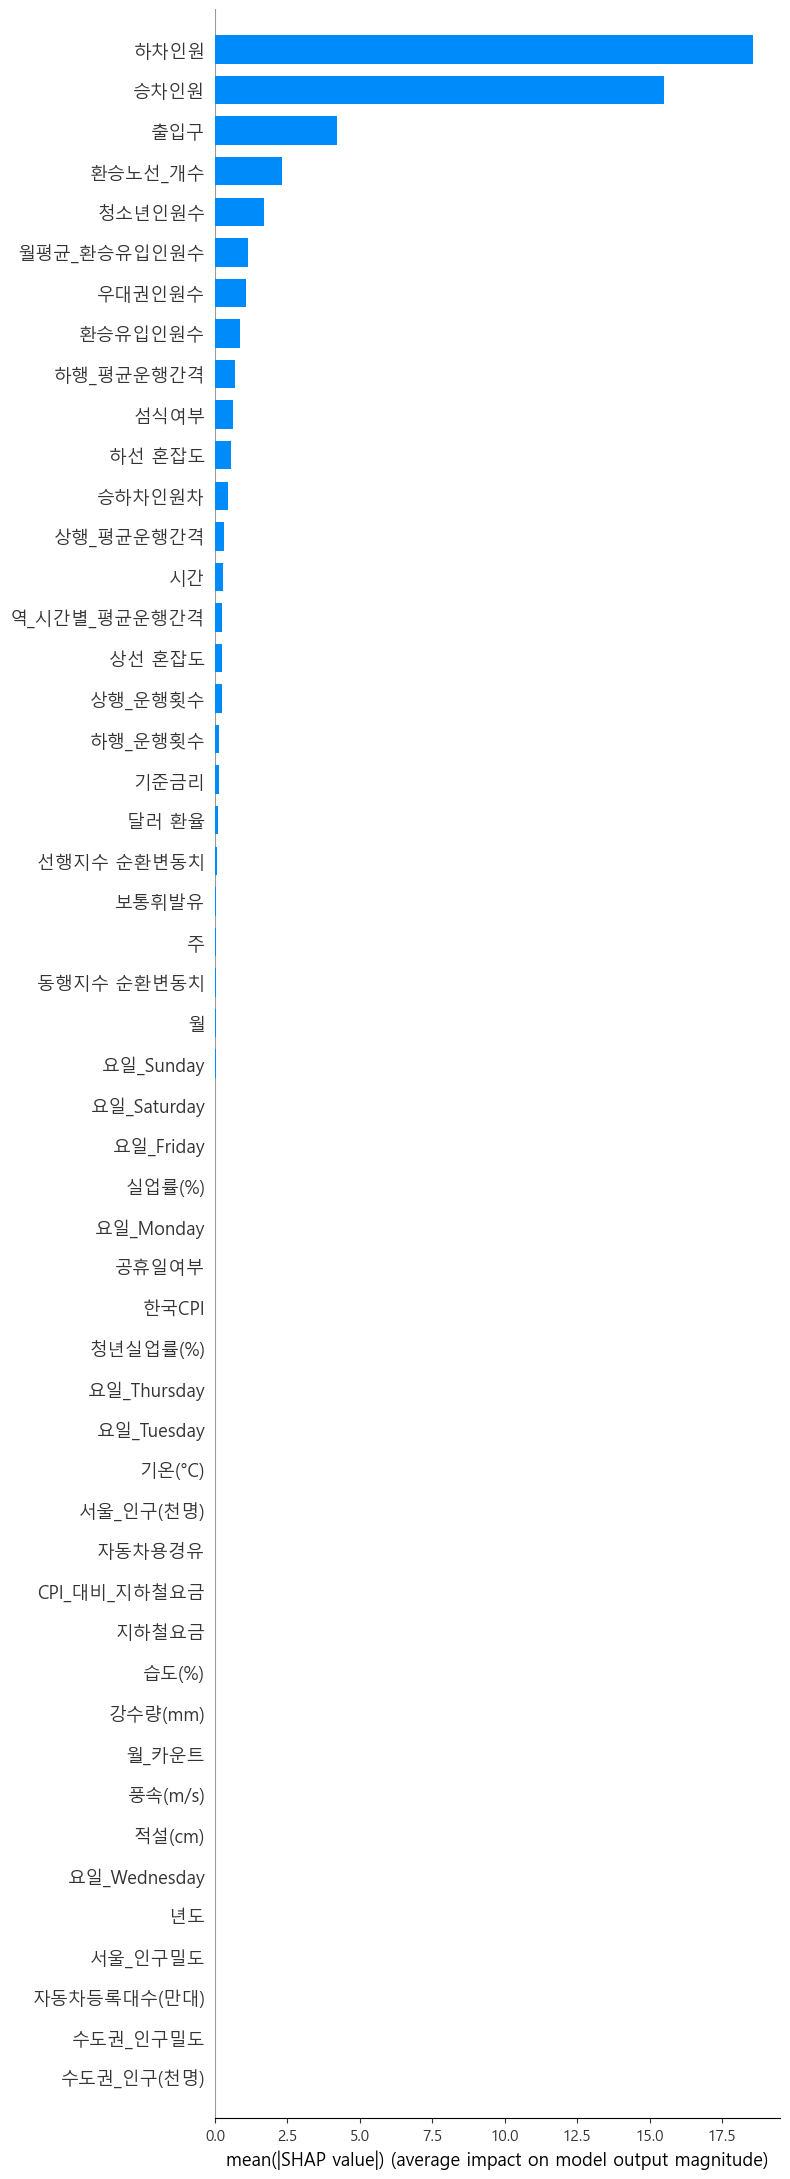

In [89]:
shap.summary_plot(shap_values, data['X_test'], feature_names=data['feature_columns'], plot_type="bar", max_display=100)

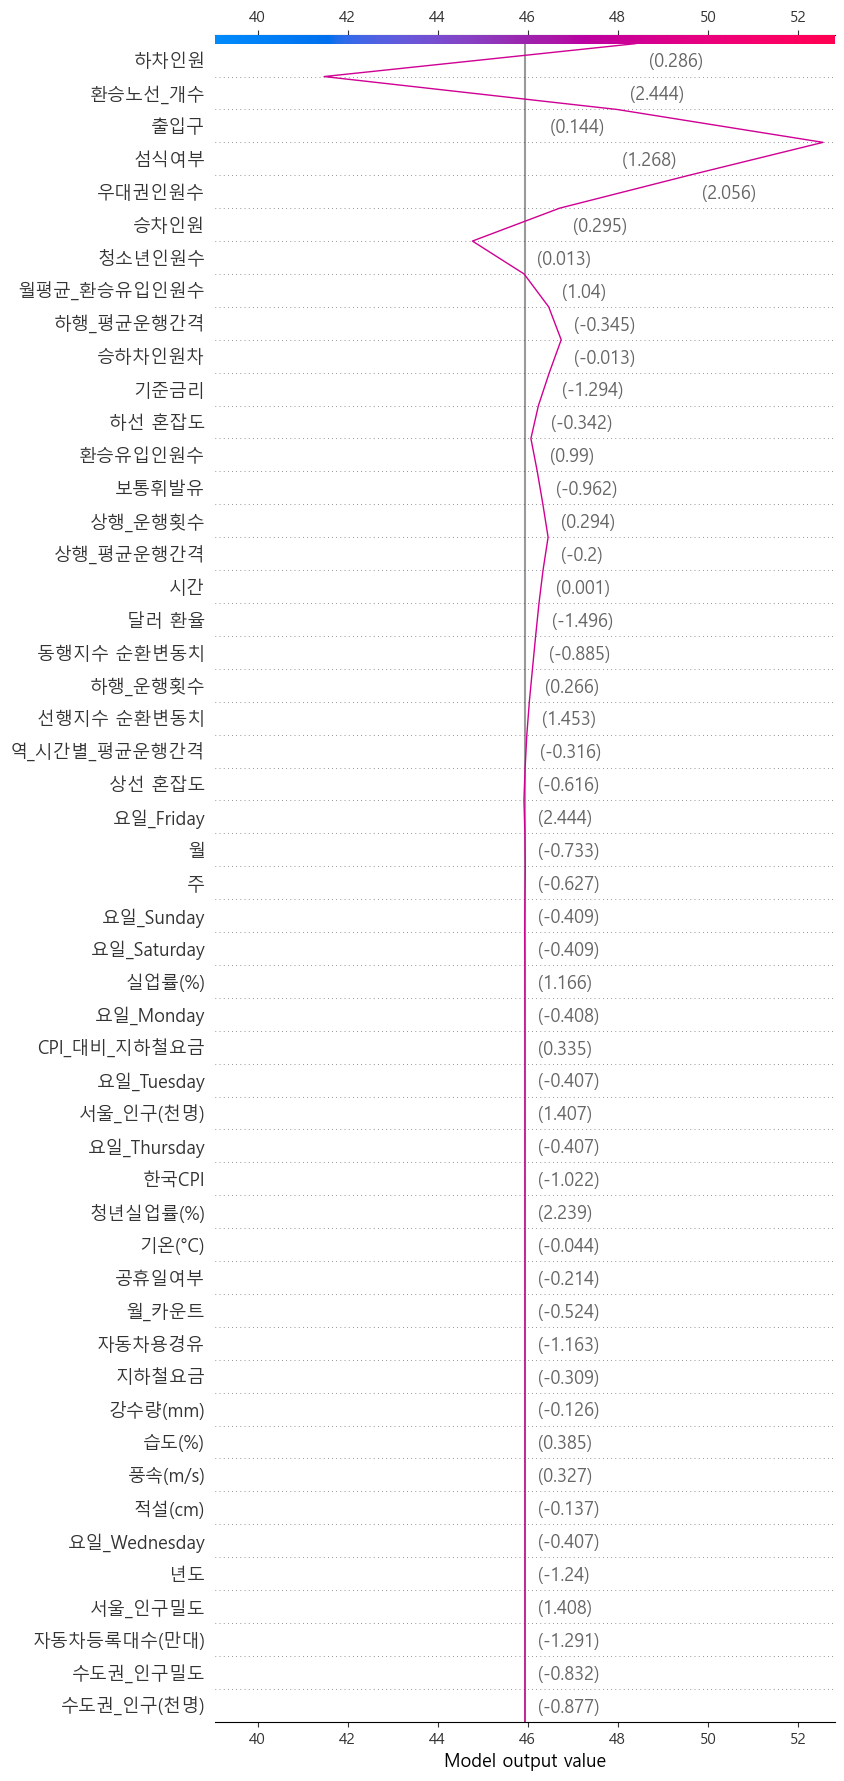

In [9]:
# 서울역 1호선
station_data = data['df_test'][(data['df_test']['역명'] == '서울역') & (data['df_test']['호선'] == 1)]

instance_index = station_data.index[0] 
X_test_station_scaled = data['scaler'].transform(station_data[data['feature_columns']])
X_test_scaled_df = pd.DataFrame(X_test_station_scaled, columns=data['feature_columns'])

# TreeExplainer 생성
explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(X_test_station_scaled)

# SHAP Decision Plot _첫 번째 인스턴스
shap.decision_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values[0],  
    features=X_test_scaled_df.iloc[0],  
    feature_names=data['feature_columns'],
    feature_display_range=slice(None, -99, -1)
)

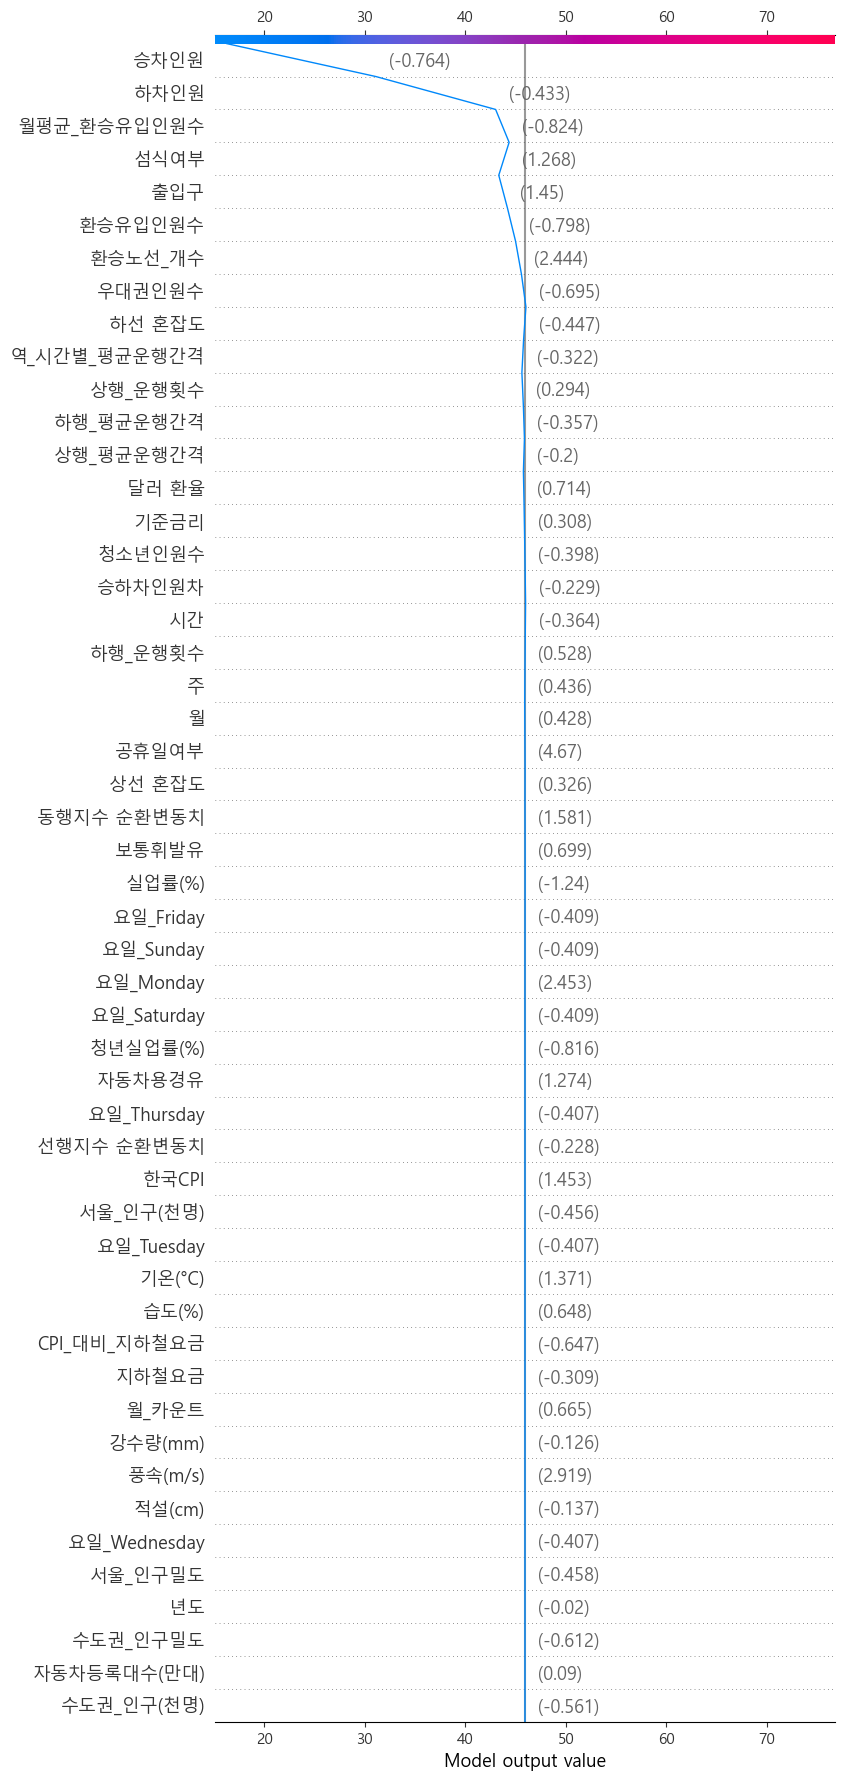

In [7]:
# 서울역 4호선
station_data = data['df_test'][(data['df_test']['역명'] == '서울역') & (data['df_test']['호선'] == 4)]

# station_data에서 첫 번째 데이터 포인트 사용
instance_index = station_data.index[0]  
X_test_station_scaled = data['scaler'].transform(station_data[data['feature_columns']])
X_test_scaled_df = pd.DataFrame(X_test_station_scaled, columns=data['feature_columns'])

# TreeExplainer 생성
explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(X_test_station_scaled)

# Decision Plot 
shap.decision_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values[0],  
    features=X_test_scaled_df.iloc[0],
    feature_names=data['feature_columns'],
    feature_display_range=slice(None, -99, -1)
)

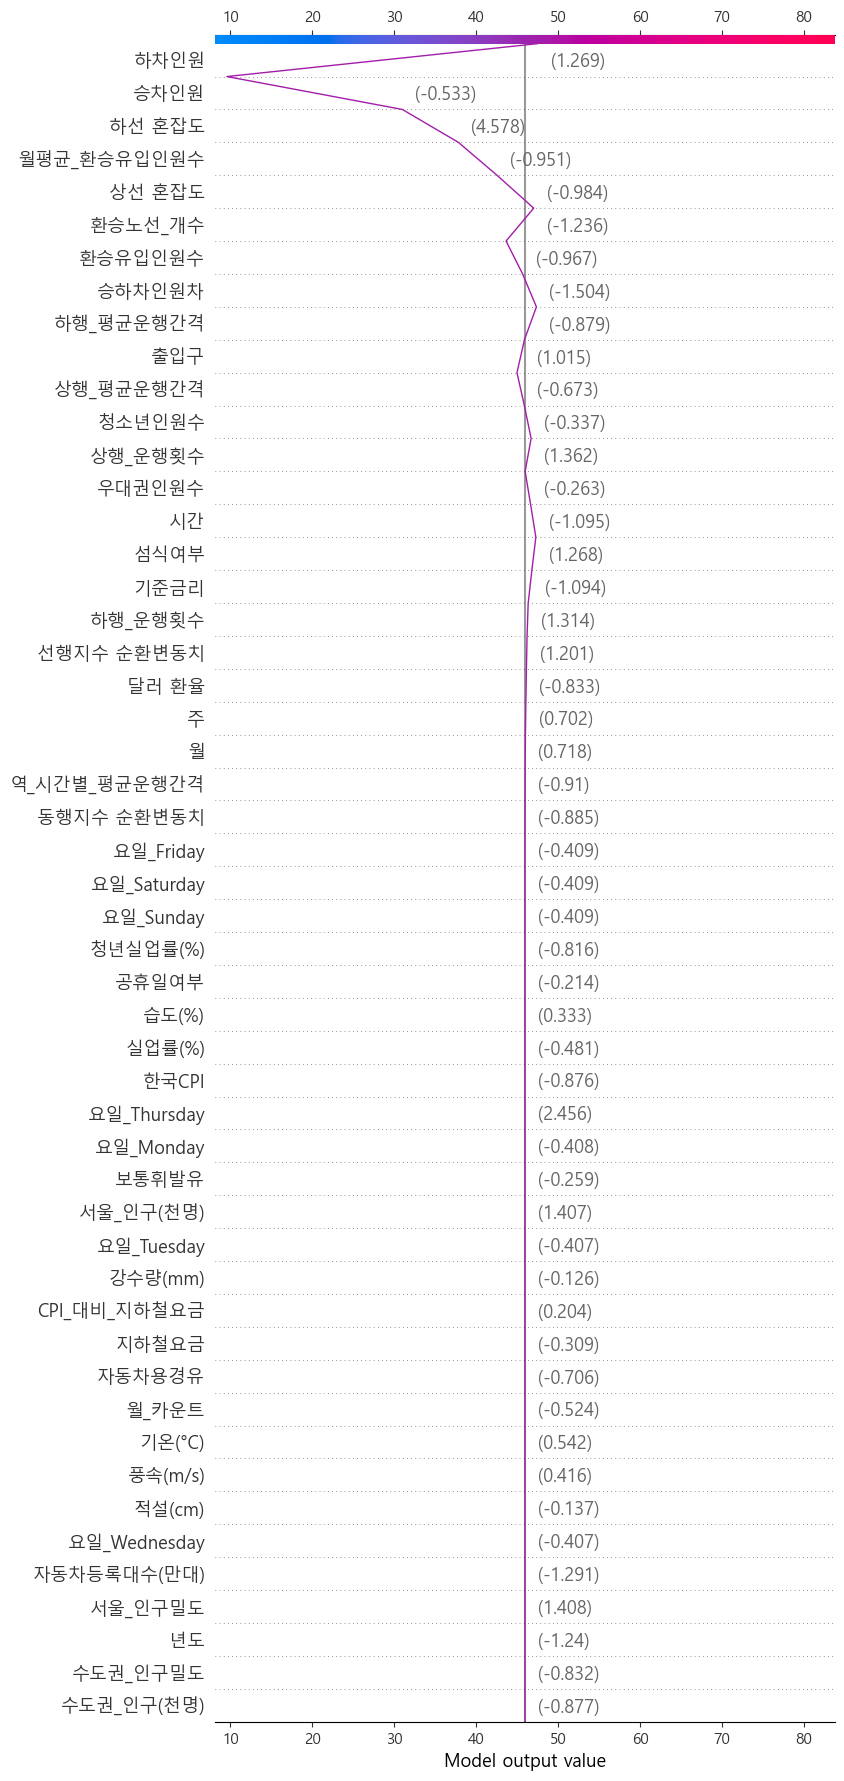

In [6]:
# 경복궁 3호선
station_data = data['df_test'][(data['df_test']['역명'] == '경복궁') & (data['df_test']['호선'] == 3)]

# 첫 번째 데이터 포인트 사용
instance_index = station_data.index[0] 
X_test_station_scaled = data['scaler'].transform(station_data[data['feature_columns']])
X_test_scaled_df = pd.DataFrame(X_test_station_scaled, columns=data['feature_columns'])

# TreeExplainer 생성
explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(X_test_station_scaled)

# Decision Plot 
shap.decision_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values[0], 
    features=X_test_scaled_df.iloc[0],  
    feature_names=data['feature_columns'],
    feature_display_range=slice(None, -99, -1)
)